# Original Code

In [1]:
# import tkinter as tk
# import random
# import math
# import time

# class Bird:
#     def __init__(self,name):
#         self.x = random.randrange(100,900)
#         self.y = random.randrange(100,900)
#         self.angle = random.uniform(0.0,2.0*math.pi)
#         self.name = name
#         self.color = "blue"

#     def draw(self,canvas):
#         size = 10
#         baseSize = 5
#         point1 = [self.x + size*math.cos(self.angle), self.y + size*math.sin(self.angle)]
#         point2 = [self.x - size*math.cos(self.angle) + baseSize*math.cos(self.angle+math.pi/2.0), \
#                   self.y - size*math.sin(self.angle) + baseSize*math.sin(self.angle+math.pi/2.0) ]
#         point3 = [self.x - size*math.cos(self.angle) - baseSize*math.cos(self.angle+math.pi/2.0), \
#                   self.y - size*math.sin(self.angle) - baseSize*math.sin(self.angle+math.pi/2.0) ]
#         canvas.create_polygon(point1+point2+point3,fill=self.color,tags=self.name)

#     def move(self,canvas):
#         distance = 5
#         self.x += distance*math.cos(self.angle)
#         self.y += distance*math.sin(self.angle)
#         self.x = self.x%1000.0
#         self.y = self.y%1000.0
#         canvas.delete(self.name)
#         self.draw(canvas)

#     def distance(self,otherBird):
#         return math.sqrt( (self.x-otherBird.x)*(self.x-otherBird.x) + \
#                           (self.y-otherBird.y)*(self.y-otherBird.y) )

# def initialise(window):
#     window.resizable(False,False)
#     canvas = tk.Canvas(window,width=1000,height=1000)
#     canvas.pack()
#     return canvas

# def addBirds(canvas):
#     birdList = []
#     noOfBirds = 50
#     for n in range(noOfBirds):
#         bird = Bird("bird"+str(n))
#         birdList.append(bird)
#         bird.draw(canvas)
#     return birdList

# def moveBirds(canvas,listOfBirds):
#     #find neighbours
#     for bird in listOfBirds:
#         nearbyBirds = []
#         for otherBird in listOfBirds:
#             if bird.distance(otherBird)<100 and (not bird.distance(otherBird)==0):
#                 nearbyBirds.append(otherBird)
#         nearestBird = None
#         if nearbyBirds:
#             shortestDistance = 1000000.0
#             for otherBird in nearbyBirds:
#                 d = bird.distance(otherBird)
#                 if d < shortestDistance:
#                     shortestDistance = d
#                     nearestBird = otherBird

#         #move 1: move away from nearest
#         if nearestBird is not None and bird.distance(nearestBird)<50 :
#             if nearestBird.x-bird.x==0.0:
#                 angle = math.atan( (nearestBird.y-bird.y)/0.0001 )
#             else:
#                 angle = math.atan( (nearestBird.y-bird.y)/(nearestBird.x-bird.x) )
#             bird.angle -= angle/2.0

#         #move 2: orient towards the neighbours
#         averageAngle = 0.0
#         if nearbyBirds:
#             for nb in nearbyBirds:
#                 averageAngle += nb.angle
#             averageAngle /= len(nearbyBirds)
#             #bird.angle -= (averageAngle-bird.angle)/100.0
#             bird.angle = averageAngle

#         #move 3: move together
#         if nearbyBirds:
#             avX = 0.0
#             avY = 0.0
#             for nb in nearbyBirds:
#                 avX += nb.x
#                 avY += nb.y
#             avX /= len(nearbyBirds)
#             avY /= len(nearbyBirds)
#             if avX-bird.x==0.0:
#                 angle = math.atan( (avY-bird.y)/0.0001 )
#             else:
#                 angle = math.atan( (avY-bird.y)/(avX-bird.x) )
#             bird.angle -= angle/20.0
            
#     for bird in listOfBirds:
#         bird.move(canvas)
#     canvas.after(100,moveBirds,canvas,listOfBirds)
        
# def main():
#     window = tk.Tk()
#     canvas = initialise(window)
#     birdList = addBirds(canvas)
#     moveBirds(canvas,birdList)
#     window.mainloop()

# main()


# My Code
## Boid Class (33% custom)

* Changed size (trivial)
* Modified distance calculation so it takes into account the fact they loop around the window
* Custom method for checking if the distance given is looped or not
* Custom method for killing the fish
* Made optional to give a start x, y, and angle, for giving birth

In [2]:
import numpy as np
import random
import tkinter as tk
import random
import math
import time
from treelib import Node, Tree
import matplotlib.pyplot as plt
import os 
import pickle
import pandas as pd

In [3]:
# just used for the colour of print statements to make it easier to debug
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [4]:
class Fish:

    def __init__(self, name, x=None, y=None, angle=None):
        ######### CUSTOM MODIFIEd TO WORK WITH GIVING BIRTH #########
        if x == None:
            self.x = random.randrange(100,900)
        else:
            self.x = x
        if y == None:
            self.y = random.randrange(100,900)
        else:
            self.y = y
        if angle == None:
            self.angle = random.uniform(0.0,2.0*math.pi)
        else:
            self.angle = angle
        
        ###### END OF CUSTOM SEGMENT #######
        
        self.name = name
        self.color = "blue"
        self.size=5
        self.speed = 5
      
    ### Helper functions ###
    
    def draw(self, canvas):
        size = self.size
        baseSize = self.size/2
        point1 = [self.x + size*math.cos(self.angle), self.y + size*math.sin(self.angle)]
        point2 = [self.x - size*math.cos(self.angle) + baseSize*math.cos(self.angle+math.pi/2.0), \
                  self.y - size*math.sin(self.angle) + baseSize*math.sin(self.angle+math.pi/2.0) ]
        point3 = [self.x - size*math.cos(self.angle) - baseSize*math.cos(self.angle+math.pi/2.0), \
                  self.y - size*math.sin(self.angle) - baseSize*math.sin(self.angle+math.pi/2.0) ]
        canvas.create_polygon(point1+point2+point3,fill=self.color,tags=self.name)
        
    def move(self,canvas):
        distance = self.speed
        self.x += distance*math.cos(self.angle)
        self.y += distance*math.sin(self.angle)
#         self.x = max(0, min(self.x, 1000))
#         self.y = max(0, min(self.y, 1000))
        self.x = self.x%1000
        self.y = self.y%1000
        canvas.delete(self.name)
        self.draw(canvas)

    ### CUSTOM METHODS
    def distance(self, otherAgent):
        #distance calculated as looping around the map
        a_sqr = min(abs((self.x-otherAgent.x)),1000-abs(self.x-otherAgent.x))**2
        b_sqr = min(abs((self.y-otherAgent.y)),1000-abs(self.y-otherAgent.y))**2
        return math.sqrt(a_sqr + b_sqr)
    def distance_looped_bool(self, otherAgent):
        return (((abs(self.x-otherAgent.x))> 500) or ((abs(self.y-otherAgent.y))> 500))
    
    def killed(self, fishList,canvas):
        fishList.remove(self)
        canvas.delete(self.name)
        canvas.delete(self.name+"aversionLine")
    
    ### END OF CUSTOM METHODS

## The predator (shark) class (100% custom)

* Sharks have a perception radius which determines how close prey has to get for it to consider hunting it
    * What they can 'see'
* Sharks are driven by hunger and are always moving towards prey
* 3 types of prey a shark considers:
    1. fish: the boids agents
    2. carcass: all sharks are scavengers and if a carcass exists that it can see it'll always focus on that first regardless of the distance as it won't be able to swim away making it an easy catch
    3. smaller sharks: if a shark is n% bigger than another shark it can eat it. Whether or not it will consider eating it will depend on how much energy it has left and it's gene determining how hungry it has to be to consider eating another shark.
        * If it does consider eating sharks it will still consider fish: it will find the closest shark + closest fish it can see and then weigh up which one offers the greatest increase in energy vs distance.

* Sharks also have an aversion radius which determines how close a predator that's large enough to eat it has to get before it gets scared and swims away

In [5]:
#method for drawing the radius circles for the shark
def draw_radius_circle(canvas, x, y, r, colour, name, loop_around):
    #drawing perception radius 
    canvas.create_oval(x-r, y-r, x+r, y+r, fill="", outline=colour, tags=name)
    
    #drawing it looping around boundaries
    if(loop_around):
        if(x-r<0):
            x2 = x+1000
            canvas.create_oval(x2-r, y-r, x2+r, y+r, fill="", outline=colour, tags=name)
        if(x+r>1000):
            x2 = x-1000
            canvas.create_oval(x2-r, y-r, x2+r, y+r, fill="", outline=colour, tags=name)
        if(y-r<0):
            y2 = y+1000
            canvas.create_oval(x-r, y2-r, x+r, y2+r, fill="", outline=colour, tags=name)
        if(y+r>1000):
            y2 = y-1000
            canvas.create_oval(x-r, y2-r, x+r, y2+r, fill="", outline=colour, tags=name)

In [6]:
#this is the carcass of a predator that starved
class Carcass:
    def __init__(self, name, size, x, y, angle, canvas):
        self.x = x
        self.y = y
        self.angle = angle
        self.name = name
        self.size = size
        self.color = "silver"
        self.draw(canvas)
    def draw(self, canvas):
        size = self.size
        baseSize = size/2
        point1b = [self.x + size*math.cos(self.angle), self.y + size*math.sin(self.angle)]
        point2b = [self.x - size*math.cos(self.angle) + baseSize*math.cos(self.angle+math.pi/2.0), \
                  self.y - size*math.sin(self.angle) + baseSize*math.sin(self.angle+math.pi/2.0) ]
        point3b = [self.x - size*math.cos(self.angle) - baseSize*math.cos(self.angle+math.pi/2.0), \
                  self.y - size*math.sin(self.angle) - baseSize*math.sin(self.angle+math.pi/2.0) ]
        canvas.create_polygon(point1b+point2b+point3b,fill=self.color,tags=self.name)
    #if this predator has been killed
    def killed(self, carcassList,canvas):
        canvas.delete(self.name)
        carcassList.remove(self)

In [7]:
class Predator:
    def __init__(self, draw_radius, draw_lines, name, energy, max_speed, size, perception_radius, canibal_size_limit, canibal_hunger_limit, aversion_radius, hunger_limit, x=None, y=None):
        if x == None:
            self.x = random.randrange(100,900)
        else:
            self.x = x
        if y == None:
            self.y = random.randrange(100,900)
        else:
            self.y = y

        self.angle = random.uniform(0.0,2.0*math.pi)

            
        self.draw_radius = draw_radius # determines if we draw radius or not
        self.draw_lines = draw_lines # determines if we want to draw target lines or not 
        self.name = name
        self.energy = energy #passing in energy
        self.color = "red"
        self.size = size # the size (if a certain % bigger than another predator it can canibalise it)
        self.perception_radius = perception_radius # radius in which we can see our prey
        self.hungerLimit = hunger_limit # we are hungry if we have less than this amount of energy
        self.max_speed = max_speed #hunting speed (faster)
        self.resting_speed = round(max_speed/2) #resting speed (slower) (eg sharks, continuously need to swim forwards)
        self.speed = self.resting_speed #default to resting speed
        self.canibal_size_limit = canibal_size_limit #what % bigger must this shark be than other sharks to consider canibalising them? 
        self.canibal_hunger_limit = canibal_hunger_limit #how hunger do you need to be to consider eating a fellow shark?
        self.aversion_radius = aversion_radius # how close do we need to be to a shark that's big enough to eat us to get scared?
    ### Helper functions ###
    
    def draw(self, canvas):
        if(self.draw_radius):
            draw_radius_circle(canvas, self.x, self.y, self.perception_radius, "yellow",self.name, True) # drawing perception radius
            draw_radius_circle(canvas, self.x, self.y, self.aversion_radius, "red",self.name, True) # drawing aversion radius
        
        #fish fill
        size = self.size
        baseSize = size/2
        point1b = [self.x + size*math.cos(self.angle), self.y + size*math.sin(self.angle)]
        point2b = [self.x - size*math.cos(self.angle) + baseSize*math.cos(self.angle+math.pi/2.0), \
                  self.y - size*math.sin(self.angle) + baseSize*math.sin(self.angle+math.pi/2.0) ]
        point3b = [self.x - size*math.cos(self.angle) - baseSize*math.cos(self.angle+math.pi/2.0), \
                  self.y - size*math.sin(self.angle) - baseSize*math.sin(self.angle+math.pi/2.0) ]
        canvas.create_polygon(point1b+point2b+point3b,fill=self.color,tags=self.name)
        
        #if considdering canibalism write the hunger in red, if we are not hungry write it in green, else write it in white
        if self.canibal_hunger_limit>self.energy:
            canvas.create_text(self.x,self.y-self.size*1.5,text=str(round(self.energy)),tags=self.name, fill="red")
        elif self.hungerLimit<=self.energy:
            canvas.create_text(self.x,self.y-self.size*1.5,text=str(round(self.energy)),tags=self.name, fill="green")
        else:
            canvas.create_text(self.x,self.y-self.size*1.5,text=str(round(self.energy)),tags=self.name, fill="white")
        
    def move(self,canvas):
        distance = self.speed
        self.x += distance*math.cos(self.angle)
        self.y += distance*math.sin(self.angle)
#         self.x = max(0, min(self.x, 1000))
#         self.y = max(0, min(self.y, 1000))
        self.x = self.x%1000
        self.y = self.y%1000
        canvas.delete(self.name)
        self.draw(canvas)

        self.energy -= self.energy_per_step()

    def energy_per_step(self):
        #modified kinetic energy formula (KE = m/2 * v^2)
        area = (self.size*(self.size/2))/2 #2d sim so best approximation of mass will just be area of the triangle
        return (((area/2*self.speed**2)/10000 + self.perception_radius/1000 + self.aversion_radius/1000)*.66 + (float(self.hungerLimit)/250)**2)/4

        
    
    def distance(self, otherAgent):
        #distance calculated as looping around the map
        a_sqr = min(abs((self.x-otherAgent.x)),1000-abs(self.x-otherAgent.x))**2
        b_sqr = min(abs((self.y-otherAgent.y)),1000-abs(self.y-otherAgent.y))**2
        return math.sqrt(a_sqr + b_sqr)
    def distance_looped_bool(self, otherAgent):
        return (((abs(self.x-otherAgent.x))> 500) or ((abs(self.y-otherAgent.y))> 500))
    
    #if just eaten then change speed and colour until 
    def just_eaten(self, energy_value):
        #not hungry for 1 second
        self.rest_timer=time.time()+3 # not hungry for 3 seconds
        self.speed = self.resting_speed
        self.energy+=energy_value # increase our energy by that of what we've just eaten
        
    #if this predator has been killed
    def killed(self, predList,canvas):
        canvas.delete(self.name)
        canvas.delete(self.name+"energyLine")
        predList.remove(self)
        
    #if this predator has starved spawn a carcass in its place
    def starved(self, predList, carcassList, canvas):
        carcassList.append(Carcass(self.name+"_carcass", self.size, self.x, self.y, self.angle,canvas))
        self.killed(predList, canvas) #kill this predator

    #finding the closest prey
    def targetPrey(self, fishList, predList, carcassList, canvas):

        targetPrey = None # defaulted to None and will stay that way unless we find one in range we can eat
        
        canvas.delete(self.name+"energyLine")
        
        #finding the closest shark carcass
        nearestCarcass = None
        shortestCarcassDistance = 1000000.0
        #looking through the carcass
        for carcass in carcassList:
            d = self.distance(carcass)
            if d < self.perception_radius and d < shortestCarcassDistance:
                shortestCarcassDistance = d
                nearestCarcass = carcass
                
        #if a carcass exist we will prefer to eat this even if it is further as it cannot swim away 
        if nearestCarcass != None:
            targetPrey = nearestCarcass
        
        #else find the nearest fish and shark
        else:
                           
            #finding the closest fish
            nearestFish = None
            shortestPreyFishDistance = 1000000.0
            #looking through the fish
            for fish in fishList:
                d = self.distance(fish)
                if d < self.perception_radius and d < shortestPreyFishDistance:
                    #the predator must be larger than the fish
                    if(self.size>fish.size):
                        shortestPreyFishDistance = d
                        nearestFish = fish


            #if we are hungry enough to consider canibalism:
            nearestSmallPredator = None
            shortestSmallPredatorDistance = 1000000.0
            if self.canibal_hunger_limit>self.energy:
                #looking through the predators to find ones that are smaller than us
                #looking through the fish
                for predator in predList:
                    #checking this predator is not us
                    if predator!=self:
                        d = self.distance(predator)
                        if d < self.perception_radius and d < shortestSmallPredatorDistance:
                            #this predator must be canibal_size_limit larger than the prey predator
                            if(self.size>predator.size*self.canibal_size_limit):
                                shortestSmallPredatorDistance = d
                                nearestSmallPredator = predator

            #deciding whether to focus on the prey or the predator 

            #if neither exist return None
            if nearestSmallPredator==None and nearestFish ==None:
                return None

            #if they exist calculate energy difference for getting to predator vs prey
            if nearestSmallPredator!=None:
                distanceNeededToCatchSmallPred = (shortestSmallPredatorDistance/(max(self.speed-nearestSmallPredator.speed,0.0001))) # calculating distance covered until we catch the prey
                energyDifferenceToGetSmallPred = nearestSmallPredator.size-(distanceNeededToCatchSmallPred*self.energy_per_step()/self.speed) #calculating energy that it will require to catch prey then subtracting that from its size to find the energy cost of hunting this prey
            if nearestFish !=None:
                distanceNeededToCatchPreyFish = (shortestPreyFishDistance/(max(self.speed-nearestFish.speed,0.0001))) # calculating distance covered until we catch the prey
                energyDifferenceToGetPreyFish = nearestFish.size-(distanceNeededToCatchPreyFish*self.energy_per_step()/self.speed) #calculating energy that it will require to catch prey then subtracting that from its size to find the energy cost of hunting this prey

            #if one doesn't exist return the other
            if nearestFish==None:
                targetPrey = nearestSmallPredator
            elif nearestSmallPredator==None:
                targetPrey = nearestFish
            #if both exist return that which gives the best energy difference
            else:
                #picking the smallest energy difference 
                # <= so if both are equal we prefer the eating fish to being a cannibal
                if(energyDifferenceToGetPreyFish<=energyDifferenceToGetSmallPred):
                    targetPrey = nearestFish
                else:
                    targetPrey = nearestSmallPredator
            
        if targetPrey != None:
            #drawing a line to the target prey
            colour="green"
            if(self.distance_looped_bool(targetPrey)):
                colour="lime"
            if(self.draw_lines):
                canvas.create_line(self.x, self.y, targetPrey.x, targetPrey.y, fill=colour,tags=self.name+"energyLine")
        
        return targetPrey
    
    def swimTowardsPrey(self, targetPrey):
        #angle to face prey
        angleTowards = math.atan2(targetPrey.y-self.y, targetPrey.x-self.x)
        
        #if we need to loop to target this prey, invert the angle
        if(self.distance_looped_bool(targetPrey)):
            angleTowards = math.radians((math.degrees(angleTowards) + 180)%360)

        ### if predators angle is within +/- certain number of degrees
        angle_range =15 # n degree range
        angle_difference = (math.degrees(self.angle) - math.degrees(angleTowards) + 180 + 360) % 360 - 180
        if (angle_difference <= angle_range and angle_difference>=-angle_range):
            self.angle = angleTowards

        #else increment the angle
        else:
            #### rotating in the shortest direction
            #if our current angle is lower than the angle we want to turn to
            if(math.degrees(self.angle)%360 < math.degrees(angleTowards)%360):
                #if turning counterclockwise results in an angle < 180 this is the shortest route so do so
                if(abs(math.degrees(self.angle)%360 - math.degrees(angleTowards)%360) < 180):
                    self.angle += 0.3
                #else turning clockwise is the shortest route
                else:
                    self.angle -= 0.3
            #else our angle is greater than the angle we want to turn to
            else:
                #if turning clockwise results in an angle < 180 this is the shortest route so do so
                if(abs(math.degrees(self.angle)%360 - math.degrees(angleTowards)%360) < 180):
                    self.angle -= 0.3
                #else turning counterclockwise is the shortest route
                else:
                    self.angle += 0.3

            self.angle*=random.randrange(85,115)/100 # adding some noise to the angle; between +/- 15%
    
    def eatPrey(self, targetPrey, populationList,canvas):
        #if we are hungry eat the prey if we get close enough
        if(self.hungerLimit>self.energy):
            self.speed = self.max_speed
            #if this prey is close enough we will eat it
            if (self.distance(targetPrey)<=self.size):
                
                
                
                #if this is a shark display a print message
                if(type(targetPrey)==Predator):
                    print(color.RED+self.name,"killed",targetPrey.name+color.END)
                elif(type(targetPrey)==Carcass):
                    print(color.YELLOW+self.name,"ate the carcass of",targetPrey.name+color.END)
                
                #prey just been killed
                energy_value=(targetPrey.size)
                targetPrey.killed(populationList,canvas)

                #predator just eaten
                self.just_eaten(energy_value)
                return True #just eaten
        return False #haven't just eaten

    def swimAwayFromBiggerSharks(self, predList):
        #finding the closest big shark above the cannibal size limit
        nearestBigShark = None
        nearestBigSharkDistance = 1000000
        for predator in predList:
            #if predator is within aversion radius and is lower than the nearestBigSharkDistance...
            this_predator_distance = self.distance(predator)
            if this_predator_distance<aversion_radius and this_predator_distance<nearestBigSharkDistance:
                #if this predator is big enough to eat us ...
                if(self.size*self.canibal_size_limit<=predator.size):
                    # update the neareast predator
                    nearestBigShark = predator
                    nearestBigSharkDistance = this_predator_distance
        #if nearestBigShark is not null then avoid it
        if(nearestBigShark!=None):
            #angle to face predator
            angleAway = math.atan2(nearestBigShark.y-self.y, nearestBigShark.x-self.x)
            #inverting angle to face away from predator
            if(not self.distance_looped_bool(nearestBigShark)):
                angleAway = math.radians((math.degrees(angleAway) + 180)%360)
                
                if(self.color!="magenta"):
                    self.color="coral"
            else:
                if(self.color!="magenta"):
                    self.color="orange"

            #updating the angle and speed
            self.speed = self.max_speed
            self.angle = angleAway 
            
            return True # return true, we are avoiding a predator
        else:
            self.speed = self.resting_speed
            return False #return false, we are not avoiding a predator


## Rendering the simulation

### Boid movement (half custom)
Default Rules:

1. Separation (avoid crowding other flockmates)
2. Alignment (move at same angle as other flockmates)
3. Cohesion (move towards other flockmates)

Custom Rules:

4. Aversion (move away from the predator class)
5. Noise (add realism by adding some noise to the above)

In [8]:
def moveFish(canvas,draw_aversion_lines_bool,listOfFish, perception_radius, minimum_radius, aversion_radius, predList, simulation_speed, number_of_fish, swarm_behaviour):
    
    #if listOfFish is empty then return message
    if len(listOfFish)<=0:
        print("no fish to move")
        return
    
    #find neighbours
    for fish in listOfFish:
        ############### CUSTOM RULES 4 (aversion) ##############
        
        # move 4 : aversion
        #check if any predators are within our aversion radius
        if(draw_aversion_lines_bool):
            canvas.delete(fish.name+"aversionLine")
        nearestPredator = None
        nearestPredatorDistance = 1000000
        for predator in predList:
            #if predator is within aversion radius and is lower than the nearestPredatorDistance...
            this_predator_distance = fish.distance(predator)
            if this_predator_distance<aversion_radius and this_predator_distance<nearestPredatorDistance:
                # update the neareast predator
                nearestPredator = predator
                nearestPredatorDistance = this_predator_distance
        #if nearestPredator is not null then avoid it
        if(nearestPredator!=None):
            #angle to face predator
            angleAway = math.atan2(nearestPredator.y-fish.y, nearestPredator.x-fish.x)
            #inverting angle to face away from predator
            if(not fish.distance_looped_bool(nearestPredator)):
                angleAway = math.radians((math.degrees(angleAway) + 180)%360)
                if(fish.color!="green"):
                    fish.color="mediumslateblue"
                if(draw_aversion_lines_bool):
                    canvas.create_line(fish.x, fish.y, nearestPredator.x, nearestPredator.y, fill="mediumslateblue",tags=fish.name+"aversionLine")
            else:
                if(fish.color!="green"):
                    fish.color="cyan"
                if(draw_aversion_lines_bool):
                    canvas.create_line(fish.x, fish.y, nearestPredator.x, nearestPredator.y, fill="cyan",tags=fish.name+"aversionLine")
            #updating the angle
            fish.angle = angleAway 
            

        ################# END OF CUSTOM SEGMENT ##################
        ###CUSTOM : PUT THIS IN AN IF STATEMENT SO CAN TEST WITHOUT THE SWARM BEHAVIOUR
        if swarm_behaviour:
            #finding the fish wihtin the perception_radius
            nearbyFish = []
            for otherFish in listOfFish:
                if fish.distance(otherFish)<perception_radius and (not fish.distance(otherFish)==0):
                    nearbyFish.append(otherFish)
            #finding the closest fish of these fish
            nearestFish = None
            if nearbyFish:
                shortestDistance = 1000000.0
                for otherFish in nearbyFish:
                    d = fish.distance(otherFish)
                    if d < shortestDistance:
                        shortestDistance = d
                        nearestFish = otherFish

            #move 1: move away from nearest
            if nearestFish is not None and fish.distance(nearestFish)<minimum_radius :
                if nearestFish.x-fish.x==0.0:
                    angle = math.atan( (nearestFish.y-fish.y)/0.0001 )
                else:
                    angle = math.atan( (nearestFish.y-fish.y)/(nearestFish.x-fish.x) )
                fish.angle -= angle/2.0

    #         #move 2: orient towards the neighbours

            ######## CUSTOM - MODIFIED THIS METHOD TO ONLY RUN IF WE ARE NOT AVOIDING PREDATOR #############

            if(nearestPredator == None): 

                averageAngle = 0.0
                if nearbyFish:
                    for nf in nearbyFish:
                        averageAngle += nf.angle
                    averageAngle /= len(nearbyFish)
                    fish.angle = averageAngle

                ##### CUSTOM - ROTATE TO ANGLE INSTEAD OF SNAPPING, CURRENTLY DISABLED AS NO NEED FOR FISH TO BE THIS SMART
    #             averageAngle = 0.0
    #             if nearbyFish:
    #                 for nb in nearbyFish:
    #                     averageAngle += nb.angle
    #                 averageAngle /= len(nearbyFish)

    #                 ### if boids angle is within +/- certain range of degrees of average angle snap to it
    #                 angle_range = 45 # n degree range
    #                 angle_difference = (math.degrees(fish.angle) - math.degrees(averageAngle) + 180 + 360) % 360 - 180
    #                 if (angle_difference <= angle_range and angle_difference>=-angle_range):
    #                     fish.angle = averageAngle

    #                 #else increment the angle
    #                 else:
    #                     #### rotating in the shortest direction
    #                     #if our current angle is lower than the angle we want to turn to
    #                     if(math.degrees(fish.angle)%360 < math.degrees(averageAngle)%360):
    #                         #if turning counterclockwise results in an angle < 180 this is the shortest route so do so
    #                         if(abs(math.degrees(fish.angle)%360 - math.degrees(averageAngle)%360) < 180):
    #                             fish.angle += 0.5
    #                         #else turning clockwise is the shortest route
    #                         else:
    #                             fish.angle -= 0.5
    #                     #else our angle is greater than the angle we want to turn to
    #                     else:
    #                         #if turning clockwise results in an angle < 180 this is the shortest route so do so
    #                         if(abs(math.degrees(fish.angle)%360 - math.degrees(averageAngle)%360) < 180):
    #                             fish.angle -= 0.5
    #                         #else turning counterclockwise is the shortest route
    #                         else:
    #                             fish.angle += 0.5

            ################# END OF CUSTOM SEGMENT ##################

            #move 3: move together
            if nearbyFish:
                avX = 0.0
                avY = 0.0
                for nb in nearbyFish:
                    avX += nb.x
                    avY += nb.y
                avX /= len(nearbyFish)
                avY /= len(nearbyFish)
                if avX-fish.x==0.0:
                    angle = math.atan( (avY-fish.y)/0.0001 )
                else:
                    angle = math.atan( (avY-fish.y)/(avX-fish.x) )
                fish.angle -= angle/20.0
            
        ############### CUSTOM RULES 5 (noise) ##############
            
            
            
        # move 5 : noise
        fish.angle*=random.randrange(85,115)/100 # adding some noise to the angle; between +/- 15%
        
        
        
        
        ################# END OF CUSTOM SEGMENT ##################
        
        
        ############## CUSTOM SECTION : GIVE BIRTH ################
        
#         preventing exponential growth that will crash my comp by limiting to a max of x fish in the population
#         if len(listOfFish)<200:
#             #1 in n chance at every time step
#             if random.randint(0,300)==1:
#                 new_boid = Fish("fish_"+str(number_of_fish), fish.x, fish.y, fish.angle)
#                 listOfFish += [new_boid]
#                 number_of_fish+=1 # increment number_of_fish so the next fish will have a unique value
            
            
        #probability of giving birth exponentially increases as population size increases due to account for problems involving population density and disease, oxygen in water competition, etc.
        if random.randint(0,int(2*len(listOfFish)**1.4))==1:
            new_boid = Fish("fish_"+str(number_of_fish), fish.x, fish.y, fish.angle)
            listOfFish += [new_boid]
            number_of_fish+=1 # increment number_of_fish so the next fish will have a unique value
            
        ################# END OF CUSTOM SEGMENT ##################
            
    for fish in listOfFish:
        fish.move(canvas)
        fish.color="blue"
    canvas.after(simulation_speed,moveFish, canvas, draw_aversion_lines_bool,listOfFish, perception_radius, minimum_radius, aversion_radius, predList, simulation_speed, number_of_fish, swarm_behaviour)

### Predator movement (100% custom)



In [9]:
def movePredators(canvas,window,count,predList, fishList, carcassList, deadPreds, simulation_speed, number_of_preds, minMeanMax_speed, minMeanMax_size, minMeanMax_canibalHunger, minMeanMax_aversionRadius, minMeanMax_perceptionRadius, minMeanMax_hungerLimit, populationSizes, run_name, shark_extinct_timestep, fish_extinct_timestep):

    #checking if fish are now extinct then storing the timestep they went extinct
    if(len(fishList)<=0 and fish_extinct_timestep==None):
        fish_extinct_timestep=count.get_starting_moves()-count.get_remaining_moves()
    
    #if predList is empty then return message
    if len(predList)<=0:
        shark_extinct_timestep=count.get_starting_moves()-count.get_remaining_moves()
        saveResults(fishList, predList, deadPreds, "predators went extinct", window, count.get_starting_moves()-count.get_remaining_moves(), minMeanMax_speed, minMeanMax_size, minMeanMax_canibalHunger, minMeanMax_aversionRadius, minMeanMax_perceptionRadius, minMeanMax_hungerLimit, populationSizes, run_name, shark_extinct_timestep, fish_extinct_timestep)
        return
    
    #holding the genes we can inspect
    max_speeds = []
    sizes = []
    canibalHungerLimits = []
    aversionRads = []
    perceptionRads = []
    hungerLimits = []
    
    #for each predator
    for predator in predList:
        
        #getting the genes which we can inspect
        max_speeds+=[predator.max_speed]
        sizes+=[predator.size]
        canibalHungerLimits+=[predator.canibal_hunger_limit]
        aversionRads+=[predator.aversion_radius]
        perceptionRads+=[predator.perception_radius]
        hungerLimits+=[predator.hungerLimit]
        
        #first priority behaviour is to swim away from bigger sharks to avoid being eaten
        swimming_away = predator.swimAwayFromBiggerSharks(predList)
        
        #if we are not swimming away scared of another shark; go back to normal behaviour
        if not swimming_away:

            targetPrey = predator.targetPrey(fishList, predList, carcassList, canvas)

            #calculate the angle towards the nearest prey
            #if targetPrey is not null then attack it
            if(targetPrey!=None):

                #eat prey if we are close enough
                if(type(targetPrey)==Predator):
                    if(predator.eatPrey(targetPrey,predList,canvas)):
                        deadPreds.append(("was cannibalised",targetPrey)) # keeping track of dead preds so we can inspect them at end of run
                        continue # continue if we have just eaten
                elif(type(targetPrey)==Fish):
                     if(predator.eatPrey(targetPrey,fishList,canvas)):
                        continue # continue if we have just eaten
                else:
                    if(predator.eatPrey(targetPrey,carcassList, canvas)):
                        continue # continue if we've just eaten

                #highlight the prey we are attacking (different colours for predator vs fish)
                if(type(targetPrey)==Predator):
                    targetPrey.color="magenta"
                else:
                    targetPrey.color="green"

                #swim towards our prey
                predator.swimTowardsPrey(targetPrey)
            #else we are just wondering aimlessly so do so at our resting speed
            else:
                predator.speed = predator.resting_speed
                
                
            #giving birth
            #1 in n chance at every time step
            if random.randint(0,1000)==1:
                #giving birth and applying random mutation of +/- up to 20% to each parameter
                new_pred = Predator(predator.draw_radius, predator.draw_lines, "predator_"+str(number_of_preds),predator.energy,predator.max_speed*(random.randrange(80,120)/100), predator.size*(random.randrange(80,120)/100), predator.perception_radius*(random.randrange(80,120)/100),1.2,predator.canibal_hunger_limit*(random.randrange(80,120)/100), predator.aversion_radius*(random.randrange(80,120)/100), predator.hungerLimit*(random.randrange(80,120)/100), predator.x, predator.y)
                
                #giving child and parent 50% of energy that the parent had prior to birth so we don't have extra energy appear out of nowhere
                new_pred.energy= max(new_pred.energy/2,1)
                predator.energy= max(predator.energy/2,1)
                
                print(color.GREEN+predator.name+" just gave birth to "+new_pred.name+color.END)
                predList += [new_pred]
                number_of_preds+=1 # increment number_of_fish so the next fish will have a unique value
                
    #appending population sizes for this timestep
    populationSizes[0].append(len(predList))
    populationSizes[1].append(len(fishList))
    
    #appending the gene min, mean and max values
    minMeanMax_speed[0].append(min(max_speeds))
    minMeanMax_speed[1].append(np.mean(max_speeds))
    minMeanMax_speed[2].append(max(max_speeds))
    
    minMeanMax_size[0].append(min(sizes))
    minMeanMax_size[1].append(np.mean(sizes))
    minMeanMax_size[2].append(max(sizes))
    
    minMeanMax_canibalHunger[0].append(min(canibalHungerLimits))
    minMeanMax_canibalHunger[1].append(np.mean(canibalHungerLimits))
    minMeanMax_canibalHunger[2].append(max(canibalHungerLimits))
    
    minMeanMax_aversionRadius[0].append(min(aversionRads))
    minMeanMax_aversionRadius[1].append(np.mean(aversionRads))
    minMeanMax_aversionRadius[2].append(max(aversionRads))
    
    minMeanMax_perceptionRadius[0].append(min(perceptionRads))
    minMeanMax_perceptionRadius[1].append(np.mean(perceptionRads))
    minMeanMax_perceptionRadius[2].append(max(perceptionRads))
    
    minMeanMax_hungerLimit[0].append(min(hungerLimits))
    minMeanMax_hungerLimit[1].append(np.mean(hungerLimits))
    minMeanMax_hungerLimit[2].append(max(hungerLimits))

    #move each predator
    for predator in predList:
        predator.move(canvas)
        predator.color="red"
        #if this predator is out of energy, kill it
        if(predator.energy<=0):
            print(predator.name,"starved to death") # keeping track of dead preds so we can inspect them at end of run
            deadPreds.append(("starved to death",predator))
            predator.starved(predList, carcassList, canvas)
                 
    #if we have run out of time then exit the function
    if not count.predator_timestep(): # tell the counter another time step has passed
        saveResults(fishList, predList, deadPreds, "time ran out", window, count.get_starting_moves()-count.get_remaining_moves(), minMeanMax_speed, minMeanMax_size, minMeanMax_canibalHunger, minMeanMax_aversionRadius, minMeanMax_perceptionRadius, minMeanMax_hungerLimit, populationSizes, run_name, shark_extinct_timestep, fish_extinct_timestep)
        return
        
    #run next iteration of the canvas
    canvas.after(simulation_speed,movePredators,canvas,window, count, predList,fishList, carcassList, deadPreds, simulation_speed, number_of_preds, minMeanMax_speed, minMeanMax_size, minMeanMax_canibalHunger, minMeanMax_aversionRadius, minMeanMax_perceptionRadius, minMeanMax_hungerLimit, populationSizes, run_name, shark_extinct_timestep, fish_extinct_timestep)


In [10]:
def saveResults(fishList, predList, deadPreds, reason, window, timesteps, minMeanMax_speed, minMeanMax_size, minMeanMax_canibalHunger, minMeanMax_aversionRadius, minMeanMax_perceptionRadius, minMeanMax_hungerLimit, populationSizes, run_name, shark_extinct_timestep, fish_extinct_timestep):
    #if the counter returned False it means the counter has ended so finish this
    print(color.BOLD+color.BLUE+"\n\nfinished this run because "+reason+color.END)
    print("Fish left: "+str(len(fishList)))#+" ("+str(round(len(fishList)/num_boids*100))+"%)")
    print("Sharks left: "+str(len(predList)))#+" ("+str(round(len(predList)/num_preds*100))+"%)\n")
    print("Dead sharks: "+str(len(deadPreds)))
    print("Timesteps passed: "+str(timesteps))
    print(f"Fish went extinct at timestep {fish_extinct_timestep}" if fish_extinct_timestep!=None else "Fish did not go extinct")
    print(f"Sharks went extinct at timestep {shark_extinct_timestep}" if shark_extinct_timestep!=None else "Sharks did not go extinct")
    
#         print(color.BOLD+color.BLUE+"\nSharks that survived"+color.END)
#         for p in predList:
#             print(p.name+" survived with "+str(round(p.energy))+" energy\nsize:"+str(p.size)+"\nperception_radius:"+str(p.perception_radius)+"\nmax_speed:"+str(p.max_speed)+"\ncanibal_hunger_limit:"+str(p.canibal_hunger_limit)+"\naversion_radius:"+str(p.aversion_radius)+"\nhunger_limit:"+str(p.hungerLimit)+"\n")
#         print(color.BOLD+color.BLUE+"\nSharks that died"+color.END)
#         for d in deadPreds:
#             print(d[1].name+" "+d[0]+"\nsize:"+str(d[1].size)+"\nperception_radius:"+str(d[1].perception_radius)+"\nmax_speed:"+str(d[1].max_speed)+"\ncanibal_hunger_limit:"+str(d[1].canibal_hunger_limit)+"\naversion_radius:"+str(d[1].aversion_radius)+"\nhunger_limit:"+str(d[1].hungerLimit)+"\n")
    
    #destorying the tkinter window
    window.destroy()
    
    #making the directory if it doesn't already exist
    if not os.path.exists(f'./{run_name}/plots'):
        os.makedirs(f'./{run_name}/plots')
    
    #saving the stats so we can manipulate total stats for each type we are experimenting with at the end
    with open(f'./{run_name}/populationSizes.pickle', 'wb') as handle:
        pickle.dump(populationSizes, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(f'./{run_name}/timesteps_passed.pickle', 'wb') as handle:
        pickle.dump(timesteps, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(f'./{run_name}/minMeanMax_speed.pickle', 'wb') as handle:
        pickle.dump(minMeanMax_speed, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(f'./{run_name}/minMeanMax_size.pickle', 'wb') as handle:
        pickle.dump(minMeanMax_size, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(f'./{run_name}/minMeanMax_canibalHunger.pickle', 'wb') as handle:
        pickle.dump(minMeanMax_canibalHunger, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(f'./{run_name}/minMeanMax_aversionRadius.pickle', 'wb') as handle:
        pickle.dump(minMeanMax_aversionRadius, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(f'./{run_name}/minMeanMax_perceptionRadius.pickle', 'wb') as handle:
        pickle.dump(minMeanMax_perceptionRadius, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(f'./{run_name}/minMeanMax_hungerLimit.pickle', 'wb') as handle:
        pickle.dump(minMeanMax_hungerLimit, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(f'./{run_name}/shark_extinct_timestep.pickle', 'wb') as handle:
        pickle.dump(shark_extinct_timestep, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(f'./{run_name}/fish_extinct_timestep.pickle', 'wb') as handle:
        pickle.dump(fish_extinct_timestep, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    #plotting populations
    fig = plt.figure()
    ax = plt.axes()
    plt.title(f"{run_name} population sizes over time")
    plt.xlabel("Timesteps")
    plt.ylabel("Population size")
    plt.plot(populationSizes[0], '-r', label='shark population size')
    plt.plot(populationSizes[1], '-b', label='fish population size')
    plt.legend()
    plt.show()
    fig.savefig(f'./{run_name}/plots/_populations.png')
    plt.close()

    #plotting genes

    #plotting speed genes
    fig = plt.figure()
    ax = plt.axes()
    plt.title(f"{run_name} speed gene distribution over time")
    plt.xlabel("Timesteps")
    plt.ylabel("Speed value")
    plt.plot(minMeanMax_speed[2], ':r', label='max')
    plt.plot(minMeanMax_speed[1], '-g', label='mean')
    plt.plot(minMeanMax_speed[0], ':b', label='min')
    plt.legend()
    plt.show()
    fig.savefig(f'./{run_name}/plots/speed.png')
    plt.close()

    #plotting size genes
    fig = plt.figure()
    ax = plt.axes()
    plt.title(f"{run_name} size gene distribution over time")
    plt.xlabel("Timesteps")
    plt.ylabel("Size value")
    plt.plot(minMeanMax_size[2], ':r', label='max')
    plt.plot(minMeanMax_size[1], '-g', label='mean')
    plt.plot(minMeanMax_size[0], ':b', label='min')
    plt.legend()
    plt.show()
    fig.savefig(f'./{run_name}/plots/size.png')
    plt.close()

    #plotting cannibal hunger limit genes
    fig = plt.figure()
    ax = plt.axes()
    plt.title(f"{run_name} cannibal hunger limit gene distribution over time")
    plt.xlabel("Timesteps")
    plt.ylabel("Cannibal hunger limit value")
    plt.plot(minMeanMax_canibalHunger[2], ':r', label='max')
    plt.plot(minMeanMax_canibalHunger[1], '-g', label='mean')
    plt.plot(minMeanMax_canibalHunger[0], ':b', label='min')
    plt.legend()
    plt.show()
    fig.savefig(f'./{run_name}/plots/cannibal_hunger.png')
    plt.close()

    #plotting aversionRadius genes
    fig = plt.figure()
    ax = plt.axes()
    plt.title(f"{run_name} aversion Radius gene distribution over time")
    plt.xlabel("Timesteps")
    plt.ylabel("Size value")
    plt.plot(minMeanMax_aversionRadius[2], ':r', label='max')
    plt.plot(minMeanMax_aversionRadius[1], '-g', label='mean')
    plt.plot(minMeanMax_aversionRadius[0], ':b', label='min')
    plt.legend()
    plt.show()
    fig.savefig(f'./{run_name}/plots/aversion_radius.png')
    plt.close()

    #plotting PerceptionRadius genes
    fig = plt.figure()
    ax = plt.axes()
    plt.title(f"{run_name} perceptionRadius gene distribution over time")
    plt.xlabel("Timesteps")
    plt.ylabel("Size value")
    plt.plot(minMeanMax_perceptionRadius[2], ':r', label='max')
    plt.plot(minMeanMax_perceptionRadius[1], '-g', label='mean')
    plt.plot(minMeanMax_perceptionRadius[0], ':b', label='min')
    plt.legend()
    plt.show()
    fig.savefig(f'./{run_name}/plots/perception_radius.png')
    plt.close()

    #plotting hungerLimit genes
    fig = plt.figure()
    ax = plt.axes()
    plt.title(f"{run_name} hungerLimit gene distribution over time")
    plt.xlabel("Timesteps")
    plt.ylabel("Size value")
    plt.plot(minMeanMax_hungerLimit[2], ':r', label='max')
    plt.plot(minMeanMax_hungerLimit[1], '-g', label='mean')
    plt.plot(minMeanMax_hungerLimit[0], ':b', label='min')
    plt.legend()
    plt.show()
    fig.savefig(f'./{run_name}/plots/hunger_limit.png')
    plt.close()


### Main Controller (100% custom)

Explanation of what is seen:
* Fish colours:
    * Blue : normal boids behaviour
    * Slate : fleeing a shark that is within x amount of distance
    * Cyan : fleeing a shark that is within x amount of distance looping around the edge
    * Green: being targeted by a shark
* Fish aversion line colours (optional):
    * Slate : point at the shark this is fleeing from
    * Cyan : point at the shark this is fleeing from looping around the edge
    
    
* Shark colours:
    * Red : normal shark behaviour
    * Coral : fleeing a shark that's big enough to eat it
    * Orange : fleeing a shark that's big enough to eat it looped around the edge
    * Pink : being targetted by a shark that wants to eat it
    * Silver : shark starved to death as it ran out of energy, carcass is still present ready to be scavenged by another shark

* Shark text:
    * White : shark is hungry
    * Green : shark is full (energy > hunger_limit) (moving at rest speed and won't eat again until hungry again)
    * Red : shark is hungry enough to consider eating another shark
    
* Shark target line colours (optional):
    * Green : shark is targetting this prey
    * Lime : shark is targetting this prey and it must loop around the edge
    
* Shark radius colours (optional):
    * Yellow : perception radius (how close does prey need to be for it to see it)
    * Red : aversion radius (how close must another shark get before it becomes scared enough to run away)
    


In [11]:
class Counter:
    def __init__(self,remaining_moves):
        self.starting_moves = remaining_moves
        self.remaining_moves = remaining_moves # how many moves there are in a generation
    def predator_timestep(self):
        self.remaining_moves-=1#decrement remaining moves
        if self.remaining_moves>0:
            return True # return True to continue running
        return False # return False to terminate the program
    def get_remaining_moves(self):
        return self.remaining_moves
    def get_starting_moves(self):
        return self.starting_moves

In [12]:

def addFish(canvas, num_boids):
    #creating the boids based on num_boids
    number_of_fish = 0 # used to give each fish a unique id
    all_fish = []
    for i in range(num_boids):
        new_boid = Fish("fish_"+str(number_of_fish))
        all_fish += [new_boid]
        number_of_fish+=1 # increment number_of_fish so the next fish will have a unique value
#         print(new_boid.name,": x="+str(new_boid.x)+", y="+str(new_boid.y))
    return all_fish

def addPredators(canvas, num_predators):
    #creating the predators based on num_predators
    all_preds = []
    for i in range(num_predators):
        perception_radius = random.randrange(50,300)
        aversion_radius = random.randrange(50,300)
        hunger_limit = random.randrange(100,200)
        new_pred = Predator(False, False, "predator_"+str(len(all_preds)),hunger_limit,random.randrange(5,12), random.randrange(6,20), perception_radius,cannibal_size_limit,random.randrange(0,hunger_limit), aversion_radius, hunger_limit)
        all_preds += [new_pred]
#         print(new_pred.name,": x="+str(new_pred.x)+", y="+str(new_pred.y))
    return all_preds
        
def initialise(window):
    window.resizable(False,False)
    canvas = tk.Canvas(window,width=1000,height=1000, bg="black")
    canvas.pack()
    return canvas

def writeTrackers(canvas, fishList, predList, count):
    canvas.delete("tracker")
    canvas.create_text(40,10,text="Fish left: "+str(len(fishList)),tags="tracker", fill="white")
    canvas.create_text(46,30,text="Sharks left: "+str(len(predList)),tags="tracker", fill="white")
#     canvas.create_text(58,10,text="Fish left: "+str(len(fishList))+" ("+str(round(len(fishList)/num_boids*100))+"%)",tags="tracker", fill="white")
#     canvas.create_text(62,30,text="Sharks left: "+str(len(predList))+" ("+str(round(len(predList)/num_preds*100))+"%)",tags="tracker", fill="white")
    canvas.create_text(58,50,text="Timesteps left: "+str(count.remaining_moves),tags="tracker", fill="white")
    canvas.after(1,writeTrackers,canvas,fishList, predList, count)
    







						BOIDS_0

predator_1 just gave birth to predator_10
predator_2 just gave birth to predator_11
predator_8 just gave birth to predator_12
predator_8 just gave birth to predator_13
predator_13 just gave birth to predator_14
predator_5 just gave birth to predator_15
predator_8 just gave birth to predator_16
predator_5 just gave birth to predator_17
predator_14 starved to death
predator_6 just gave birth to predator_18
predator_0 ate the carcass of predator_14_carcass
predator_2 starved to death
predator_15 just gave birth to predator_19
predator_0 ate the carcass of predator_2_carcass
predator_8 starved to death
predator_16 ate the carcass of predator_8_carcass
predator_5 just gave birth to predator_20
predator_13 starved to death
predator_5 starved to death
predator_20 ate the carcass of predator_5_carcass
predator_18 ate the carcass of predator_13_carcass
predator_16 starved to death
predator_17 starved to death
predator_3 ate the carcass of predator_16_carcass
predator_6 ate th

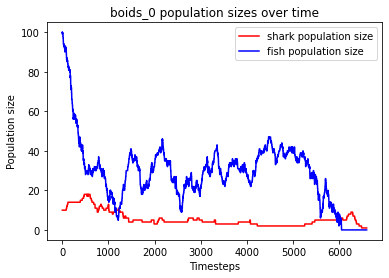

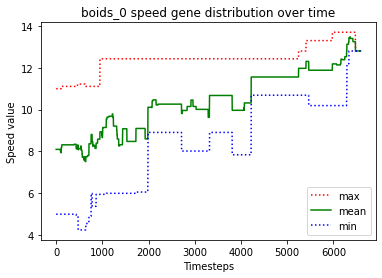

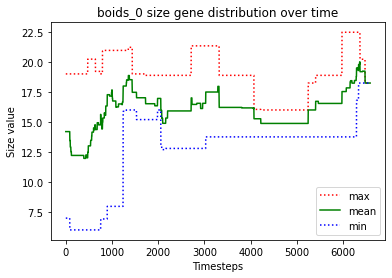

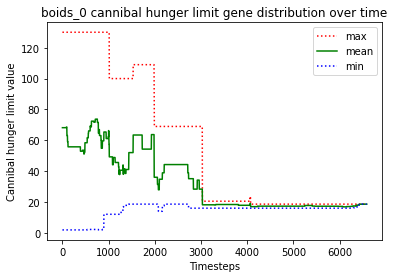

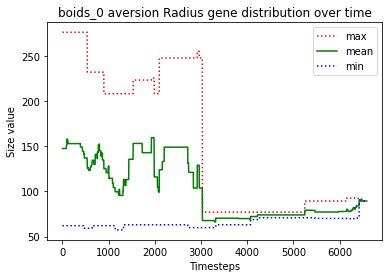

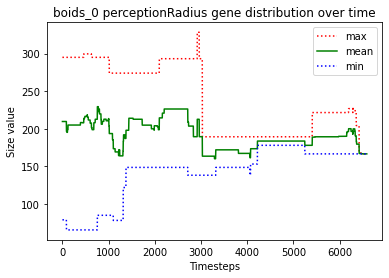

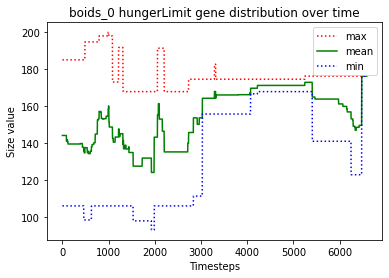





						BOIDS_1

predator_6 just gave birth to predator_10
predator_0 just gave birth to predator_11
predator_5 just gave birth to predator_12
predator_11 just gave birth to predator_13
predator_7 just gave birth to predator_14
predator_5 killed predator_6
predator_11 just gave birth to predator_15
predator_5 just gave birth to predator_16
predator_10 starved to death
predator_11 starved to death
predator_13 starved to death
predator_5 ate the carcass of predator_11_carcass
predator_12 ate the carcass of predator_10_carcass
predator_8 ate the carcass of predator_13_carcass
predator_2 just gave birth to predator_17
predator_5 killed predator_17
predator_14 starved to death
predator_4 just gave birth to predator_18
predator_4 ate the carcass of predator_14_carcass
predator_7 just gave birth to predator_19
predator_7 starved to death
predator_19 ate the carcass of predator_7_carcass
predator_16 starved to death
predator_1 ate the carcass of predator_16_carcass
predator_9 just gave birth

predator_59 just gave birth to predator_66
predator_45 just gave birth to predator_67
predator_66 just gave birth to predator_68
predator_66 just gave birth to predator_69
predator_69 starved to death
predator_66 ate the carcass of predator_69_carcass
predator_68 starved to death
predator_67 ate the carcass of predator_68_carcass
predator_59 starved to death
predator_66 starved to death
predator_50 ate the carcass of predator_66_carcass
predator_64 just gave birth to predator_70
predator_45 just gave birth to predator_71
predator_50 ate the carcass of predator_59_carcass
predator_50 just gave birth to predator_72
predator_71 just gave birth to predator_73
predator_71 starved to death
predator_73 starved to death
predator_45 ate the carcass of predator_71_carcass
predator_45 ate the carcass of predator_73_carcass
predator_45 just gave birth to predator_74
predator_45 starved to death
predator_74 starved to death
predator_64 ate the carcass of predator_74_carcass
predator_70 ate the carc

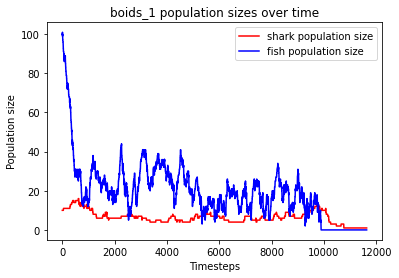

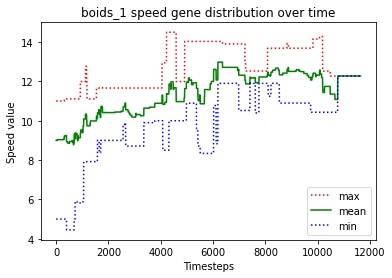

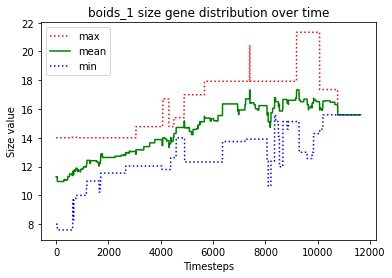

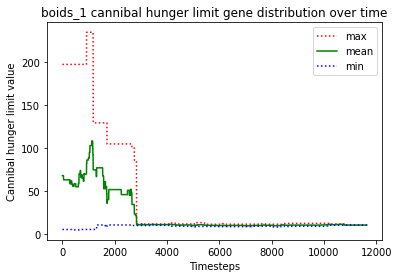

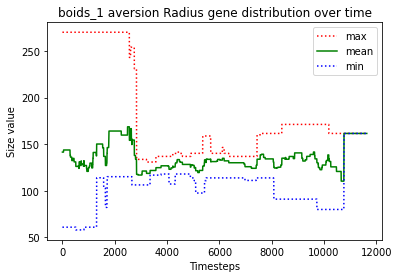

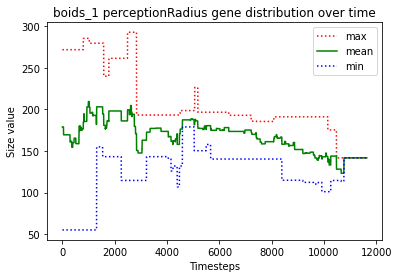

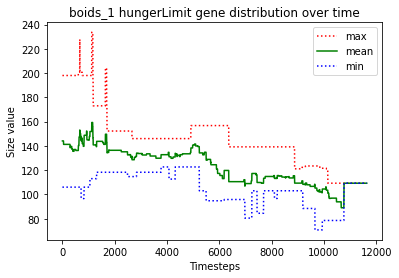





						BOIDS_2

predator_8 just gave birth to predator_10
predator_8 just gave birth to predator_11
predator_3 just gave birth to predator_12
predator_9 just gave birth to predator_13
predator_9 killed predator_12
predator_3 just gave birth to predator_14
predator_7 just gave birth to predator_15
predator_14 starved to death
predator_3 starved to death
predator_10 starved to death
predator_7 ate the carcass of predator_10_carcass
predator_5 ate the carcass of predator_3_carcass
predator_11 starved to death
predator_5 ate the carcass of predator_14_carcass
predator_5 ate the carcass of predator_11_carcass
predator_9 just gave birth to predator_16
predator_16 starved to death
predator_8 starved to death
predator_9 ate the carcass of predator_16_carcass
predator_1 ate the carcass of predator_8_carcass
predator_13 starved to death
predator_9 starved to death
predator_6 ate the carcass of predator_13_carcass
predator_6 ate the carcass of predator_9_carcass
predator_15 just gave birth to 

predator_44 ate the carcass of predator_64_carcass
predator_25 just gave birth to predator_72
predator_71 just gave birth to predator_73
predator_71 killed predator_73
predator_44 ate the carcass of predator_57_carcass
predator_46 just gave birth to predator_74
predator_68 starved to death
predator_44 ate the carcass of predator_68_carcass
predator_50 just gave birth to predator_75
predator_72 just gave birth to predator_76
predator_69 just gave birth to predator_77
predator_25 just gave birth to predator_78
predator_74 starved to death
predator_46 starved to death
predator_36 starved to death
predator_78 ate the carcass of predator_46_carcass
predator_69 ate the carcass of predator_36_carcass
predator_78 ate the carcass of predator_74_carcass
predator_25 starved to death
predator_77 ate the carcass of predator_25_carcass
predator_76 starved to death
predator_78 ate the carcass of predator_76_carcass
predator_71 just gave birth to predator_79
predator_79 starved to death
predator_71 st

predator_132 killed predator_131
predator_99 just gave birth to predator_133
predator_132 killed predator_127
predator_132 killed predator_133
predator_132 just gave birth to predator_134
predator_132 killed predator_116
predator_134 killed predator_50
predator_115 starved to death
predator_69 ate the carcass of predator_115_carcass
predator_132 killed predator_69
predator_134 killed predator_129
predator_132 killed predator_114
predator_134 killed predator_99
predator_126 just gave birth to predator_135
predator_132 just gave birth to predator_136
predator_132 starved to death
predator_134 ate the carcass of predator_132_carcass
predator_134 just gave birth to predator_137
predator_137 starved to death
predator_134 ate the carcass of predator_137_carcass
predator_134 starved to death
predator_136 ate the carcass of predator_134_carcass
predator_135 starved to death
predator_126 ate the carcass of predator_135_carcass
predator_126 just gave birth to predator_138
predator_136 just gave 

predator_186 ate the carcass of predator_199_carcass
predator_194 starved to death
predator_195 just gave birth to predator_202
predator_191 starved to death
predator_168 ate the carcass of predator_191_carcass
predator_201 ate the carcass of predator_194_carcass
predator_195 starved to death
predator_198 starved to death
predator_201 ate the carcass of predator_195_carcass
predator_202 starved to death
predator_196 just gave birth to predator_203
predator_186 ate the carcass of predator_202_carcass
predator_201 ate the carcass of predator_198_carcass
predator_168 just gave birth to predator_204
predator_196 starved to death
predator_201 ate the carcass of predator_196_carcass
predator_203 just gave birth to predator_205
predator_203 starved to death
predator_205 starved to death
predator_201 ate the carcass of predator_203_carcass
predator_168 just gave birth to predator_206
predator_206 ate the carcass of predator_205_carcass
predator_204 just gave birth to predator_207
predator_204 

predator_256 just gave birth to predator_259
predator_259 starved to death
predator_256 starved to death
predator_258 ate the carcass of predator_259_carcass
predator_258 just gave birth to predator_260
predator_258 just gave birth to predator_261
predator_233 ate the carcass of predator_256_carcass
predator_261 just gave birth to predator_262
predator_262 starved to death
predator_261 starved to death
predator_258 ate the carcass of predator_262_carcass
predator_258 ate the carcass of predator_261_carcass
predator_233 just gave birth to predator_263
predator_252 just gave birth to predator_264
predator_253 just gave birth to predator_265
predator_258 just gave birth to predator_266
predator_263 starved to death
predator_255 ate the carcass of predator_263_carcass
predator_260 starved to death
predator_255 just gave birth to predator_267
predator_266 ate the carcass of predator_260_carcass
predator_265 just gave birth to predator_268
predator_266 just gave birth to predator_269
predato

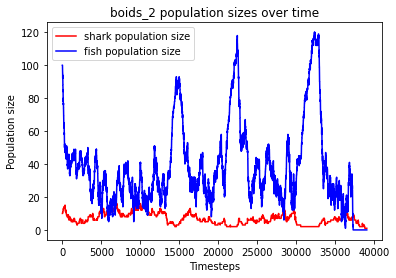

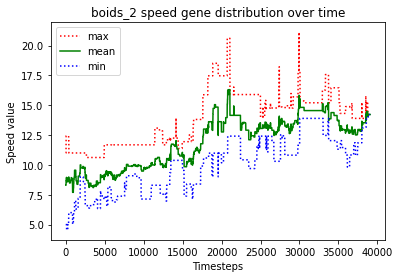

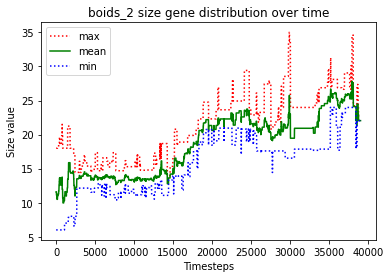

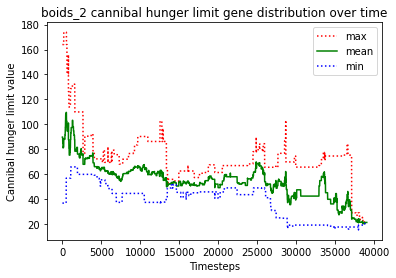

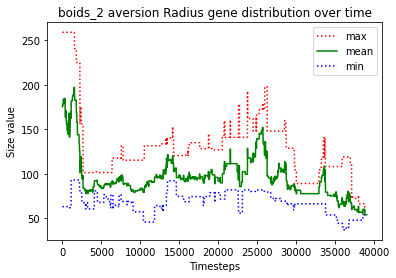

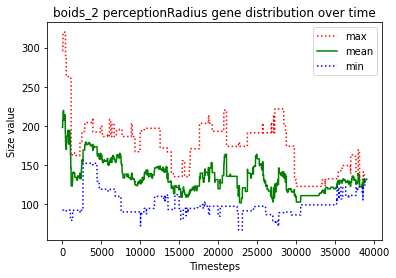

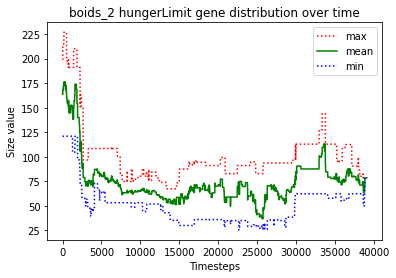





						BOIDS_3

predator_1 just gave birth to predator_10
predator_0 just gave birth to predator_11
predator_5 just gave birth to predator_12
predator_11 just gave birth to predator_13
predator_4 just gave birth to predator_14
predator_6 just gave birth to predator_15
predator_0 starved to death
predator_11 just gave birth to predator_16
predator_10 starved to death
predator_2 ate the carcass of predator_0_carcass
predator_16 starved to death
predator_11 starved to death
predator_8 ate the carcass of predator_11_carcass
predator_3 ate the carcass of predator_16_carcass
predator_14 ate the carcass of predator_10_carcass
predator_12 just gave birth to predator_17
predator_5 starved to death
predator_17 starved to death
predator_12 starved to death
predator_13 ate the carcass of predator_17_carcass
predator_4 ate the carcass of predator_5_carcass
predator_4 just gave birth to predator_18
predator_1 starved to death
predator_2 ate the carcass of predator_12_carcass
predator_14 ate the c

predator_64 just gave birth to predator_69
predator_69 killed predator_61
predator_65 just gave birth to predator_70
predator_32 just gave birth to predator_71
predator_68 starved to death
predator_53 starved to death
predator_45 ate the carcass of predator_53_carcass
predator_70 just gave birth to predator_72
predator_69 ate the carcass of predator_68_carcass
predator_66 starved to death
predator_65 ate the carcass of predator_66_carcass
predator_64 starved to death
predator_67 ate the carcass of predator_64_carcass
predator_72 starved to death
predator_70 starved to death
predator_67 ate the carcass of predator_72_carcass
predator_32 starved to death
predator_71 ate the carcass of predator_70_carcass
predator_44 ate the carcass of predator_32_carcass
predator_69 starved to death
predator_71 ate the carcass of predator_69_carcass
predator_67 just gave birth to predator_73
predator_44 just gave birth to predator_74
predator_74 killed predator_71
predator_67 just gave birth to predator_

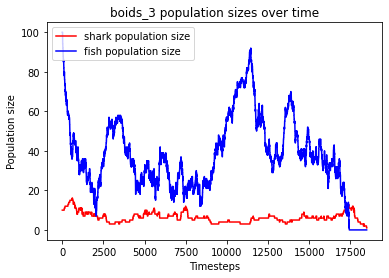

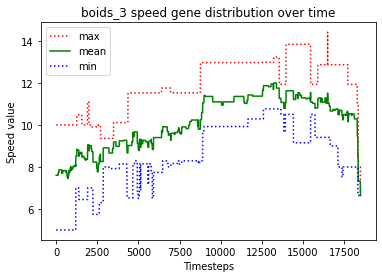

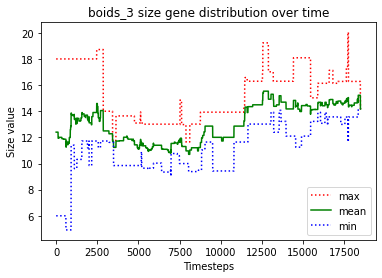

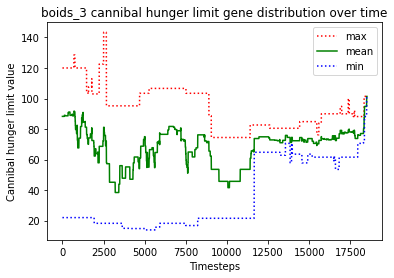

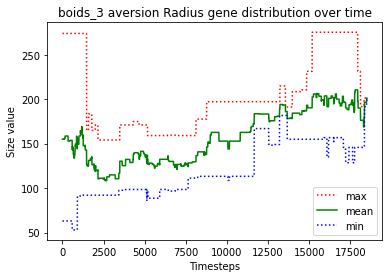

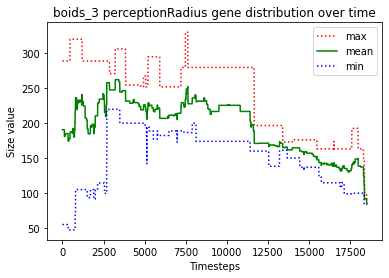

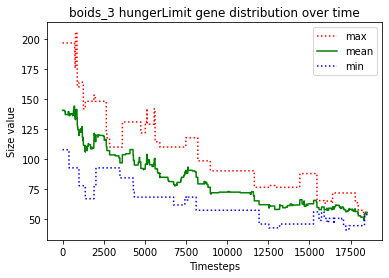





						BOIDS_4

predator_4 just gave birth to predator_10
predator_4 just gave birth to predator_11
predator_0 just gave birth to predator_12
predator_0 just gave birth to predator_13
predator_8 just gave birth to predator_14
predator_9 just gave birth to predator_15
predator_10 starved to death
predator_0 starved to death
predator_15 ate the carcass of predator_0_carcass
predator_3 ate the carcass of predator_10_carcass
predator_13 starved to death
predator_5 just gave birth to predator_16
predator_11 starved to death
predator_14 ate the carcass of predator_11_carcass
predator_4 starved to death
predator_8 ate the carcass of predator_13_carcass
predator_12 starved to death
predator_7 ate the carcass of predator_4_carcass
predator_3 just gave birth to predator_17
predator_9 ate the carcass of predator_12_carcass
predator_15 just gave birth to predator_18
predator_17 just gave birth to predator_19
predator_16 just gave birth to predator_20
predator_5 just gave birth to predator_21
pr

predator_66 starved to death
predator_50 just gave birth to predator_67
predator_65 ate the carcass of predator_66_carcass
predator_67 starved to death
predator_65 ate the carcass of predator_67_carcass
predator_62 starved to death
predator_50 ate the carcass of predator_62_carcass
predator_50 just gave birth to predator_68
predator_65 just gave birth to predator_69
predator_68 just gave birth to predator_70
predator_70 just gave birth to predator_71
predator_70 just gave birth to predator_72
predator_72 starved to death
predator_69 ate the carcass of predator_72_carcass
predator_68 starved to death
predator_71 ate the carcass of predator_68_carcass
predator_69 just gave birth to predator_73
predator_69 starved to death
predator_71 ate the carcass of predator_69_carcass
predator_73 just gave birth to predator_74
predator_74 starved to death
predator_73 ate the carcass of predator_74_carcass
predator_73 starved to death
predator_71 starved to death
predator_70 ate the carcass of predato

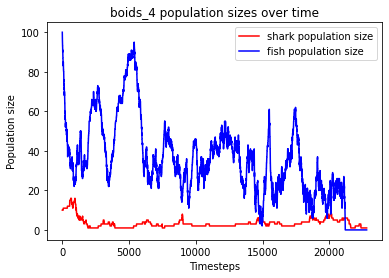

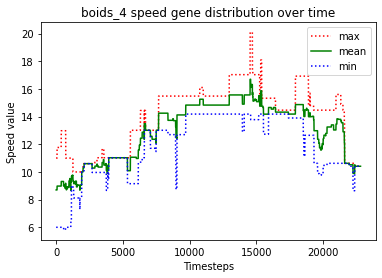

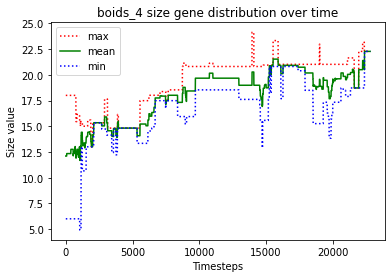

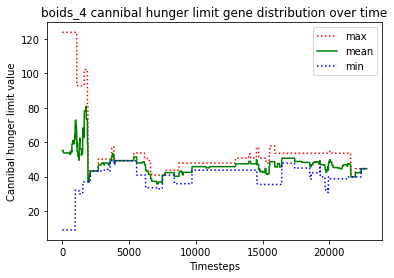

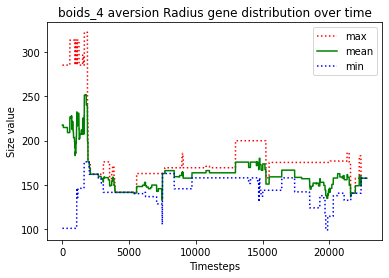

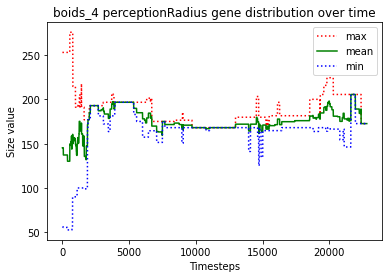

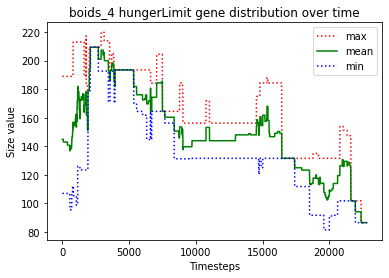





						BOIDS_5

predator_8 just gave birth to predator_10
predator_1 just gave birth to predator_11
predator_2 just gave birth to predator_12
predator_6 just gave birth to predator_13
predator_12 killed predator_4
predator_10 starved to death
predator_0 just gave birth to predator_14
predator_8 ate the carcass of predator_10_carcass
predator_11 just gave birth to predator_15
predator_11 just gave birth to predator_16
predator_11 starved to death
predator_16 starved to death
predator_12 ate the carcass of predator_16_carcass
predator_15 ate the carcass of predator_11_carcass
predator_8 starved to death
predator_14 ate the carcass of predator_8_carcass
predator_0 just gave birth to predator_17
predator_12 just gave birth to predator_18
predator_17 starved to death
predator_0 starved to death
predator_14 killed predator_6
predator_7 just gave birth to predator_19
predator_9 just gave birth to predator_20
predator_13 starved to death
predator_18 killed predator_15
predator_9 ate the car

predator_67 starved to death
predator_68 ate the carcass of predator_67_carcass
predator_56 just gave birth to predator_69
predator_56 just gave birth to predator_70
predator_69 just gave birth to predator_71
predator_56 starved to death
predator_70 starved to death
predator_64 ate the carcass of predator_70_carcass
predator_69 ate the carcass of predator_56_carcass
predator_68 starved to death
predator_64 just gave birth to predator_72
predator_64 starved to death
predator_72 starved to death
predator_71 ate the carcass of predator_64_carcass
predator_71 ate the carcass of predator_72_carcass
predator_69 just gave birth to predator_73
predator_69 starved to death
predator_73 starved to death
predator_71 ate the carcass of predator_68_carcass
predator_50 ate the carcass of predator_69_carcass
predator_50 ate the carcass of predator_73_carcass
predator_50 just gave birth to predator_74
predator_71 just gave birth to predator_75
predator_74 just gave birth to predator_76
predator_76 star

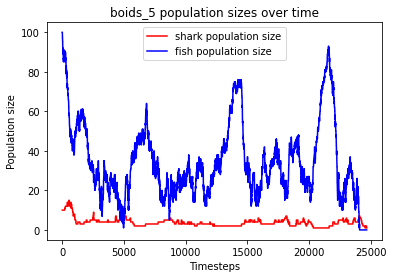

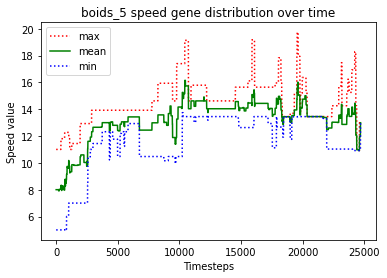

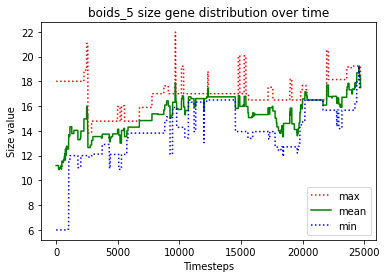

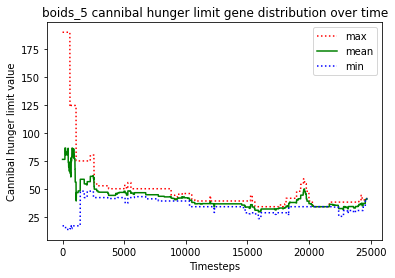

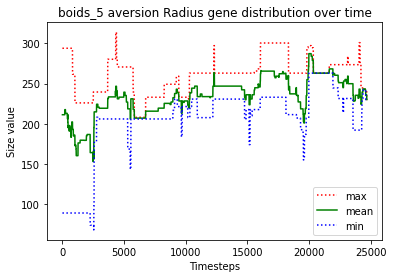

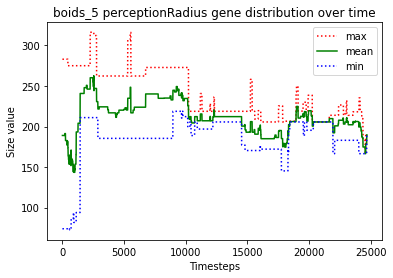

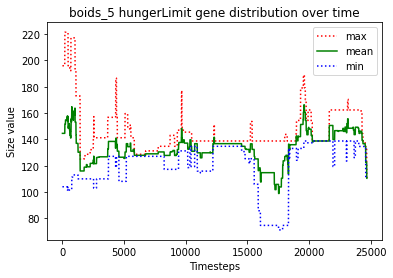





						BOIDS_6

predator_8 just gave birth to predator_10
predator_10 just gave birth to predator_11
predator_10 just gave birth to predator_12
predator_1 just gave birth to predator_13
predator_3 just gave birth to predator_14
predator_12 just gave birth to predator_15
predator_13 just gave birth to predator_16
predator_11 just gave birth to predator_17
predator_2 just gave birth to predator_18
predator_13 starved to death
predator_16 starved to death
predator_8 ate the carcass of predator_13_carcass
predator_11 ate the carcass of predator_16_carcass
predator_6 just gave birth to predator_19
predator_1 starved to death
predator_19 killed predator_3
predator_14 ate the carcass of predator_1_carcass
predator_9 starved to death
predator_18 killed predator_14
predator_2 ate the carcass of predator_9_carcass
predator_17 starved to death
predator_10 ate the carcass of predator_17_carcass
predator_15 starved to death
predator_12 starved to death
predator_19 ate the carcass of predator_12_

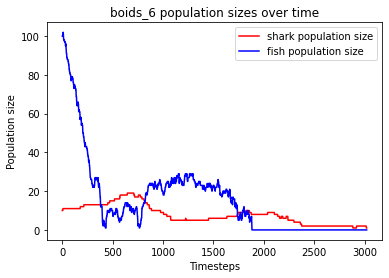

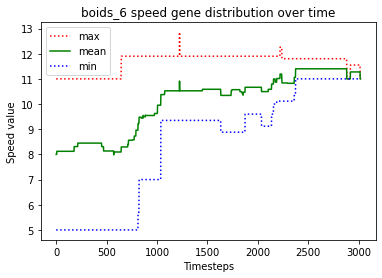

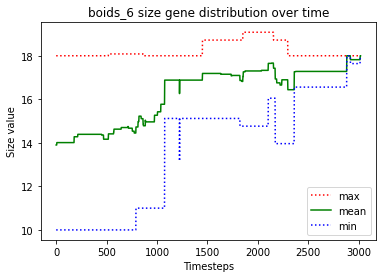

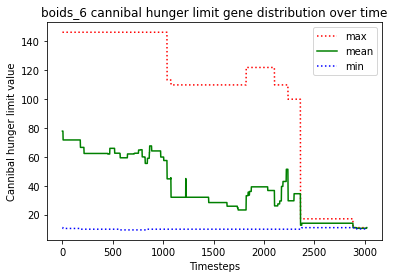

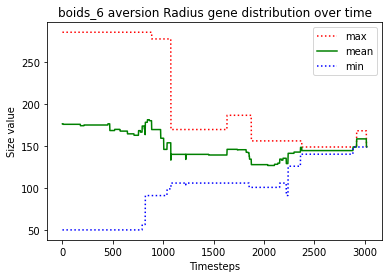

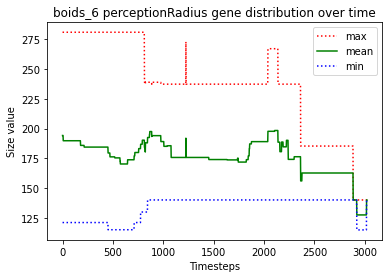

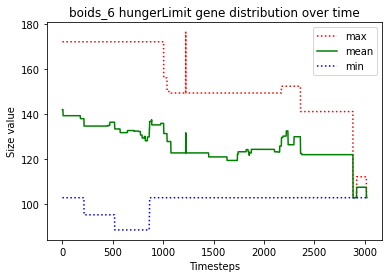





						BOIDS_7

predator_1 just gave birth to predator_10
predator_4 just gave birth to predator_11
predator_0 just gave birth to predator_12
predator_9 just gave birth to predator_13
predator_7 killed predator_8
predator_11 starved to death
predator_6 ate the carcass of predator_11_carcass
predator_1 just gave birth to predator_14
predator_4 starved to death
predator_3 ate the carcass of predator_4_carcass
predator_3 just gave birth to predator_15
predator_6 just gave birth to predator_16
predator_12 just gave birth to predator_17
predator_9 just gave birth to predator_18
predator_17 starved to death
predator_18 ate the carcass of predator_17_carcass
predator_12 starved to death
predator_18 ate the carcass of predator_12_carcass
predator_10 just gave birth to predator_19
predator_16 starved to death
predator_9 starved to death
predator_0 just gave birth to predator_20
predator_10 ate the carcass of predator_16_carcass
predator_20 ate the carcass of predator_9_carcass
predator_6 sta

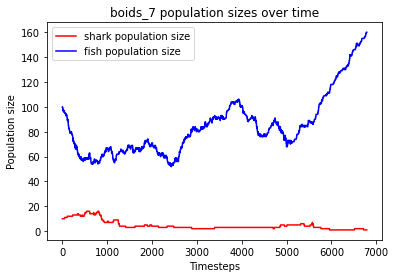

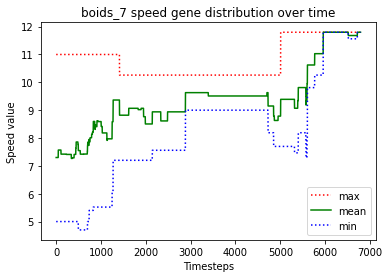

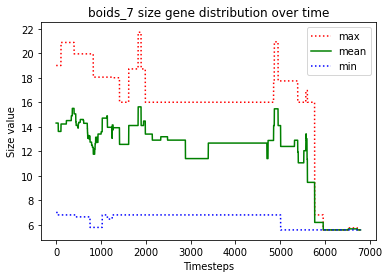

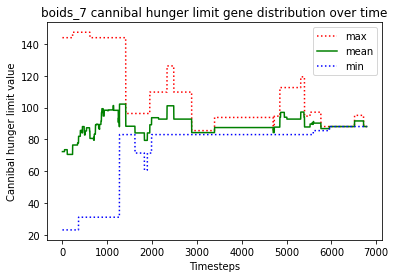

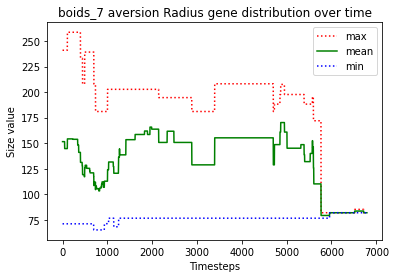

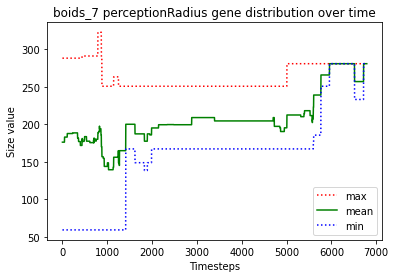

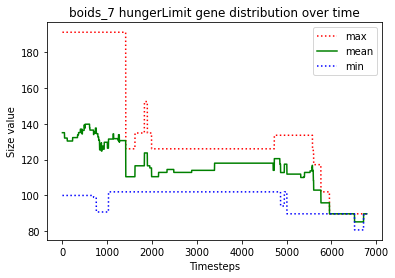





						BOIDS_8

predator_9 just gave birth to predator_10
predator_7 just gave birth to predator_11
predator_4 just gave birth to predator_12
predator_4 just gave birth to predator_13
predator_13 starved to death
predator_4 ate the carcass of predator_13_carcass
predator_3 just gave birth to predator_14
predator_9 starved to death
predator_10 ate the carcass of predator_9_carcass
predator_2 just gave birth to predator_15
predator_4 starved to death
predator_8 ate the carcass of predator_4_carcass
predator_12 starved to death
predator_7 just gave birth to predator_16
predator_10 starved to death
predator_15 ate the carcass of predator_12_carcass
predator_8 ate the carcass of predator_10_carcass
predator_11 starved to death
predator_15 ate the carcass of predator_11_carcass
predator_15 just gave birth to predator_17
predator_14 just gave birth to predator_18
predator_7 starved to death
predator_8 ate the carcass of predator_7_carcass
predator_0 just gave birth to predator_19
predator_

predator_37 starved to death
predator_69 starved to death
predator_46 just gave birth to predator_70
predator_68 killed predator_70
predator_63 just gave birth to predator_71
predator_46 ate the carcass of predator_69_carcass
predator_46 ate the carcass of predator_37_carcass
predator_68 just gave birth to predator_72
predator_71 starved to death
predator_63 starved to death
predator_58 ate the carcass of predator_63_carcass
predator_46 just gave birth to predator_73
predator_46 ate the carcass of predator_71_carcass
predator_64 just gave birth to predator_74
predator_74 just gave birth to predator_75
predator_72 starved to death
predator_73 ate the carcass of predator_72_carcass
predator_73 just gave birth to predator_76
predator_68 starved to death
predator_74 ate the carcass of predator_68_carcass
predator_75 starved to death
predator_54 ate the carcass of predator_75_carcass
predator_73 starved to death
predator_74 ate the carcass of predator_73_carcass
predator_67 just gave birth 

predator_107 starved to death
predator_127 starved to death
predator_126 starved to death
predator_123 ate the carcass of predator_127_carcass
predator_124 starved to death
predator_117 ate the carcass of predator_124_carcass
predator_79 starved to death
predator_123 ate the carcass of predator_79_carcass
predator_117 ate the carcass of predator_126_carcass
predator_116 ate the carcass of predator_107_carcass
predator_120 starved to death
predator_123 starved to death
predator_116 ate the carcass of predator_123_carcass
predator_117 ate the carcass of predator_120_carcass
predator_117 just gave birth to predator_128
predator_117 starved to death
predator_128 starved to death
predator_116 starved to death


finished this run because predators went extinct
Fish left: 0
Sharks left: 0
Dead sharks: 129
Timesteps passed: 18987
Fish went extinct at timestep 17919
Sharks went extinct at timestep 18987


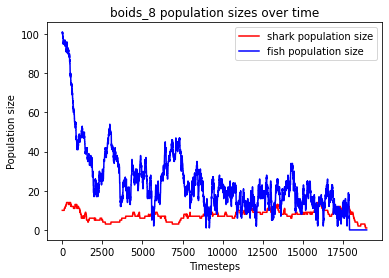

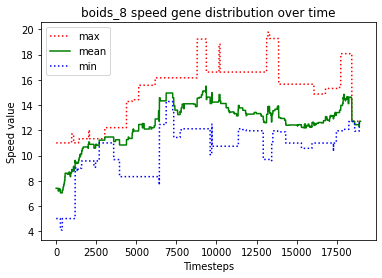

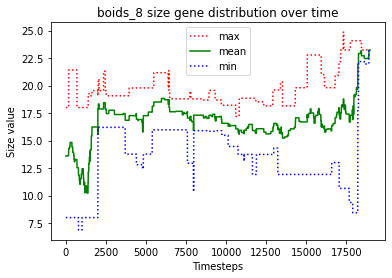

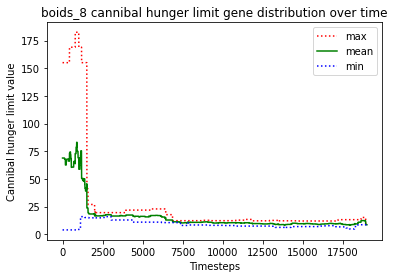

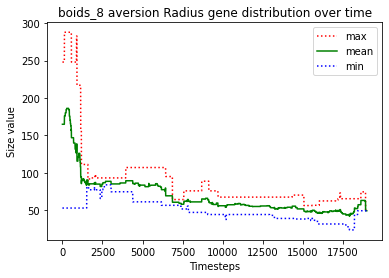

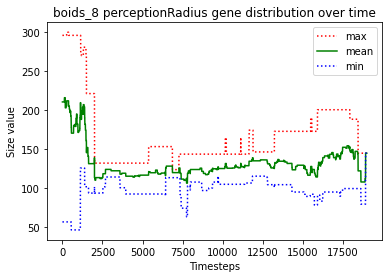

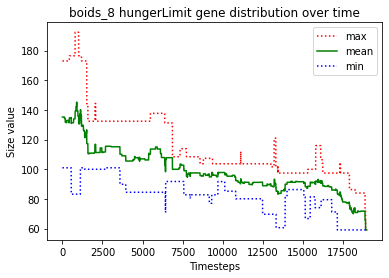





						BOIDS_9

predator_8 just gave birth to predator_10
predator_8 just gave birth to predator_11
predator_1 just gave birth to predator_12
predator_6 just gave birth to predator_13
predator_10 just gave birth to predator_14
predator_11 starved to death
predator_4 ate the carcass of predator_11_carcass
predator_10 starved to death
predator_14 starved to death
predator_0 ate the carcass of predator_10_carcass
predator_8 starved to death
predator_4 ate the carcass of predator_14_carcass
predator_0 ate the carcass of predator_8_carcass
predator_13 starved to death
predator_9 just gave birth to predator_15
predator_0 ate the carcass of predator_13_carcass
predator_6 starved to death
predator_15 just gave birth to predator_16
predator_12 ate the carcass of predator_6_carcass
predator_1 starved to death
predator_0 ate the carcass of predator_1_carcass
predator_12 just gave birth to predator_17
predator_15 starved to death
predator_16 starved to death
predator_4 ate the carcass of predat

predator_55 just gave birth to predator_65
predator_50 just gave birth to predator_66
predator_64 just gave birth to predator_67
predator_64 killed predator_66
predator_50 starved to death
predator_64 starved to death
predator_67 starved to death
predator_55 ate the carcass of predator_67_carcass
predator_55 ate the carcass of predator_64_carcass
predator_55 just gave birth to predator_68
predator_55 just gave birth to predator_69
predator_68 just gave birth to predator_70
predator_68 killed predator_69
predator_70 ate the carcass of predator_50_carcass
predator_65 just gave birth to predator_71
predator_71 just gave birth to predator_72
predator_65 just gave birth to predator_73
predator_72 starved to death
predator_68 ate the carcass of predator_72_carcass
predator_71 starved to death
predator_65 starved to death
predator_73 starved to death
predator_55 ate the carcass of predator_71_carcass
predator_70 just gave birth to predator_74
predator_70 killed predator_74
predator_55 just ga

predator_123 ate the carcass of predator_70_carcass
predator_125 ate the carcass of predator_126_carcass
predator_125 just gave birth to predator_127
predator_127 killed predator_111
predator_123 just gave birth to predator_128
predator_128 just gave birth to predator_129
predator_129 starved to death
predator_127 ate the carcass of predator_129_carcass
predator_128 killed predator_87
predator_128 just gave birth to predator_130
predator_128 starved to death
predator_123 ate the carcass of predator_128_carcass
predator_130 starved to death
predator_123 ate the carcass of predator_130_carcass
predator_125 just gave birth to predator_131
predator_113 just gave birth to predator_132
predator_123 just gave birth to predator_133
predator_133 just gave birth to predator_134
predator_133 killed predator_134
predator_123 just gave birth to predator_135
predator_123 just gave birth to predator_136
predator_133 just gave birth to predator_137
predator_131 just gave birth to predator_138
predator

predator_178 just gave birth to predator_189
predator_185 starved to death
predator_165 ate the carcass of predator_185_carcass
predator_178 starved to death
predator_174 ate the carcass of predator_178_carcass
predator_166 starved to death
predator_187 just gave birth to predator_190
predator_190 ate the carcass of predator_166_carcass
predator_189 killed predator_159
predator_187 starved to death
predator_189 just gave birth to predator_191
predator_165 just gave birth to predator_192
predator_189 starved to death
predator_191 starved to death
predator_190 ate the carcass of predator_187_carcass
predator_190 just gave birth to predator_193
predator_193 ate the carcass of predator_189_carcass
predator_193 ate the carcass of predator_191_carcass
predator_186 starved to death
predator_165 ate the carcass of predator_186_carcass
predator_188 starved to death
predator_174 ate the carcass of predator_188_carcass
predator_190 starved to death
predator_192 starved to death
predator_165 ate t

predator_237 ate the carcass of predator_244_carcass
predator_233 just gave birth to predator_246
predator_235 just gave birth to predator_247
predator_237 just gave birth to predator_248
predator_233 just gave birth to predator_249
predator_249 just gave birth to predator_250
predator_249 starved to death
predator_250 starved to death
predator_233 starved to death
predator_237 starved to death
predator_246 ate the carcass of predator_249_carcass
predator_248 starved to death
predator_245 ate the carcass of predator_248_carcass
predator_246 ate the carcass of predator_250_carcass
predator_245 ate the carcass of predator_233_carcass
predator_245 ate the carcass of predator_237_carcass
predator_247 starved to death
predator_245 ate the carcass of predator_247_carcass
predator_245 just gave birth to predator_251
predator_246 just gave birth to predator_252
predator_252 starved to death
predator_235 ate the carcass of predator_252_carcass
predator_251 just gave birth to predator_253
predat

predator_267 just gave birth to predator_305
predator_261 just gave birth to predator_306
predator_305 starved to death
predator_267 starved to death
predator_300 ate the carcass of predator_305_carcass
predator_300 just gave birth to predator_307
predator_306 starved to death
predator_261 starved to death
predator_297 ate the carcass of predator_306_carcass
predator_300 starved to death
predator_307 starved to death
predator_297 ate the carcass of predator_261_carcass
predator_297 ate the carcass of predator_300_carcass
predator_297 ate the carcass of predator_307_carcass
predator_297 ate the carcass of predator_267_carcass
predator_297 starved to death


finished this run because predators went extinct
Fish left: 0
Sharks left: 0
Dead sharks: 308
Timesteps passed: 56075
Fish went extinct at timestep 55002
Sharks went extinct at timestep 56075


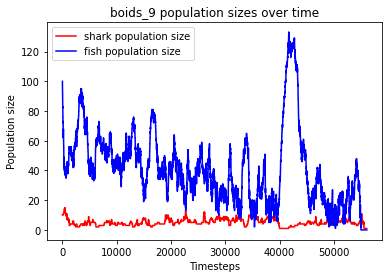

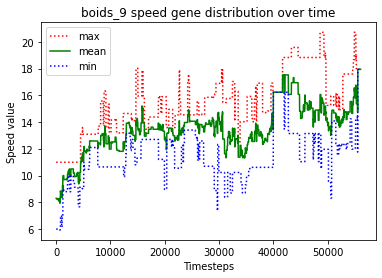

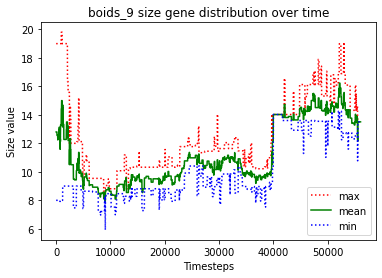

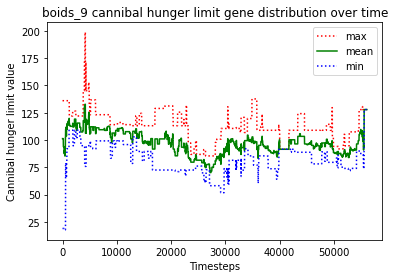

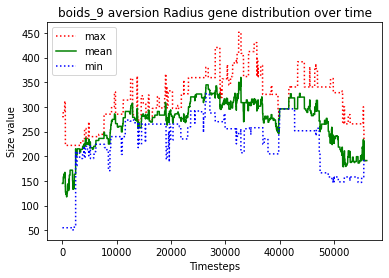

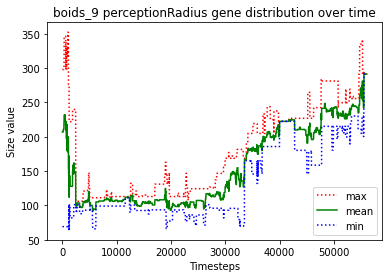

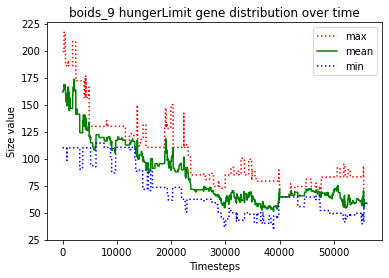





						BOIDS_10

predator_7 just gave birth to predator_10
predator_6 just gave birth to predator_11
predator_6 killed predator_11
predator_5 just gave birth to predator_12
predator_7 starved to death
predator_12 just gave birth to predator_13
predator_4 ate the carcass of predator_7_carcass
predator_10 starved to death
predator_3 just gave birth to predator_14
predator_12 starved to death
predator_6 just gave birth to predator_15
predator_5 ate the carcass of predator_10_carcass
predator_13 starved to death
predator_2 ate the carcass of predator_12_carcass
predator_9 just gave birth to predator_16
predator_2 ate the carcass of predator_13_carcass
predator_5 starved to death
predator_15 ate the carcass of predator_5_carcass
predator_3 starved to death
predator_14 starved to death
predator_8 ate the carcass of predator_3_carcass
predator_6 ate the carcass of predator_14_carcass
predator_15 just gave birth to predator_17
predator_1 just gave birth to predator_18
predator_16 just gave 

predator_69 starved to death
predator_68 starved to death
predator_65 starved to death
predator_67 ate the carcass of predator_69_carcass
predator_60 ate the carcass of predator_65_carcass
predator_64 starved to death
predator_62 ate the carcass of predator_68_carcass
predator_66 ate the carcass of predator_64_carcass
predator_67 just gave birth to predator_70
predator_67 just gave birth to predator_71
predator_70 just gave birth to predator_72
predator_71 killed predator_70
predator_71 killed predator_66
predator_62 just gave birth to predator_73
no fish to move
predator_72 just gave birth to predator_74
predator_74 just gave birth to predator_75
predator_73 starved to death
predator_60 killed predator_72
predator_74 starved to death
predator_71 ate the carcass of predator_74_carcass
predator_75 starved to death
predator_60 ate the carcass of predator_73_carcass
predator_71 just gave birth to predator_76
predator_67 ate the carcass of predator_75_carcass
predator_76 just gave birth to

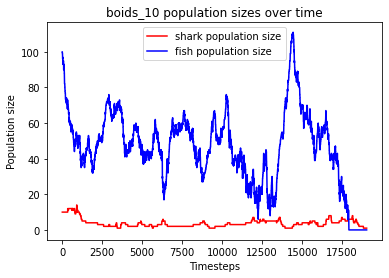

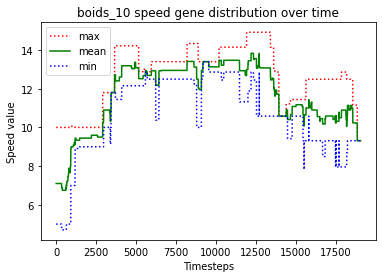

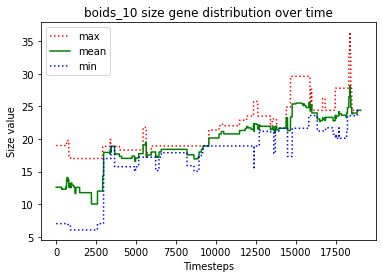

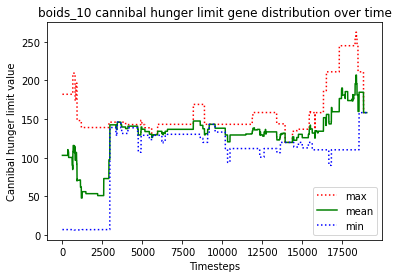

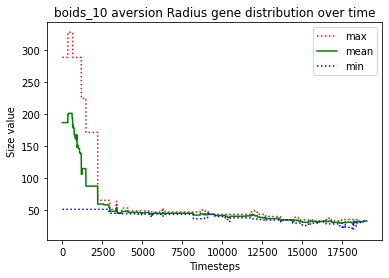

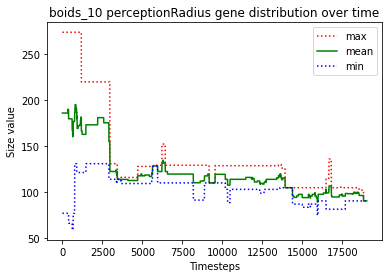

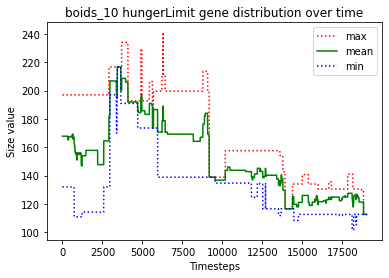





						BOIDS_11

predator_5 just gave birth to predator_10
predator_0 just gave birth to predator_11
predator_9 just gave birth to predator_12
predator_4 just gave birth to predator_13
predator_2 just gave birth to predator_14
predator_14 killed predator_3
predator_6 just gave birth to predator_15
predator_9 starved to death
predator_14 ate the carcass of predator_9_carcass
predator_6 killed predator_11
predator_2 killed predator_13
predator_14 killed predator_10
predator_12 starved to death
predator_2 ate the carcass of predator_12_carcass
predator_6 just gave birth to predator_16
predator_6 starved to death
predator_4 starved to death
predator_0 ate the carcass of predator_6_carcass
predator_0 ate the carcass of predator_4_carcass
predator_2 starved to death
predator_7 ate the carcass of predator_2_carcass
predator_16 starved to death
predator_14 ate the carcass of predator_16_carcass
predator_1 starved to death
predator_15 ate the carcass of predator_1_carcass
predator_7 just gav

predator_58 ate the carcass of predator_64_carcass
predator_43 ate the carcass of predator_66_carcass
predator_58 just gave birth to predator_68
predator_58 just gave birth to predator_69
predator_68 just gave birth to predator_70
predator_70 just gave birth to predator_71
predator_43 just gave birth to predator_72
predator_71 just gave birth to predator_73
predator_69 starved to death
predator_71 starved to death
predator_68 ate the carcass of predator_69_carcass
predator_73 ate the carcass of predator_71_carcass
no fish to move
predator_73 just gave birth to predator_74
predator_73 just gave birth to predator_75
predator_74 starved to death
predator_73 starved to death
predator_75 starved to death
predator_58 ate the carcass of predator_73_carcass
predator_58 ate the carcass of predator_74_carcass
predator_61 ate the carcass of predator_75_carcass
predator_70 starved to death
predator_61 just gave birth to predator_76
predator_58 ate the carcass of predator_70_carcass
predator_43 sta

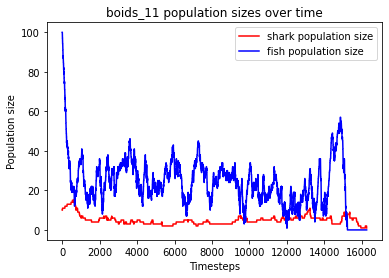

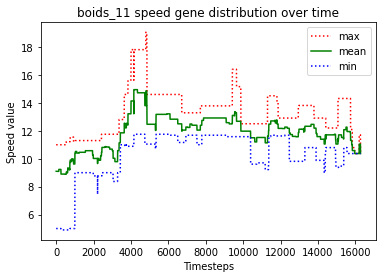

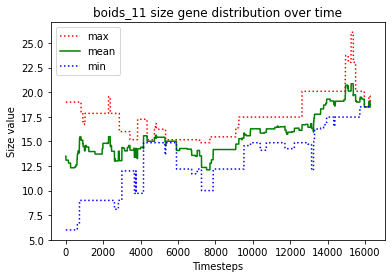

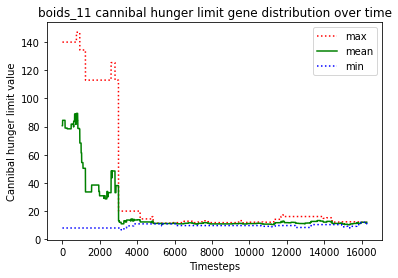

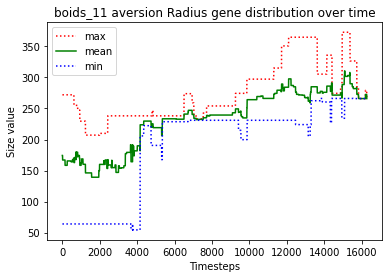

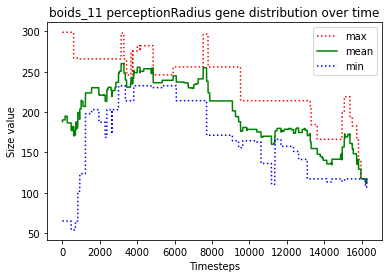

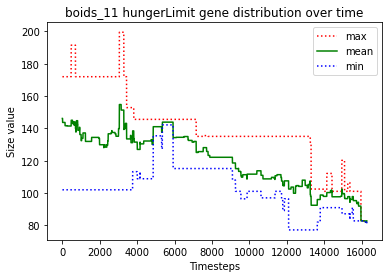





						BOIDS_12

predator_4 just gave birth to predator_10
predator_1 just gave birth to predator_11
predator_1 just gave birth to predator_12
predator_3 killed predator_9
predator_1 just gave birth to predator_13
predator_0 just gave birth to predator_14
predator_3 just gave birth to predator_15
predator_1 starved to death
predator_4 ate the carcass of predator_1_carcass
predator_4 just gave birth to predator_16
predator_13 starved to death
predator_12 starved to death
predator_8 just gave birth to predator_17
predator_15 ate the carcass of predator_13_carcass
predator_4 ate the carcass of predator_12_carcass
predator_15 killed predator_5
predator_4 killed predator_17
predator_0 just gave birth to predator_18
predator_4 killed predator_8
predator_14 just gave birth to predator_19
predator_16 starved to death
predator_4 ate the carcass of predator_16_carcass
predator_14 starved to death
predator_19 starved to death
predator_10 just gave birth to predator_20
predator_2 ate the carcas

predator_69 starved to death
predator_67 ate the carcass of predator_69_carcass
predator_67 ate the carcass of predator_68_carcass
predator_64 just gave birth to predator_70
predator_70 just gave birth to predator_71
predator_70 just gave birth to predator_72
predator_71 starved to death
predator_48 just gave birth to predator_73
predator_70 ate the carcass of predator_71_carcass
predator_67 starved to death
predator_72 starved to death
predator_70 killed predator_73
predator_64 starved to death
predator_70 ate the carcass of predator_67_carcass
predator_70 ate the carcass of predator_72_carcass
predator_48 ate the carcass of predator_64_carcass
predator_48 just gave birth to predator_74
predator_70 just gave birth to predator_75
predator_70 just gave birth to predator_76
predator_76 starved to death
predator_75 ate the carcass of predator_76_carcass
predator_70 starved to death
predator_48 ate the carcass of predator_70_carcass
predator_75 starved to death
predator_48 ate the carcass 

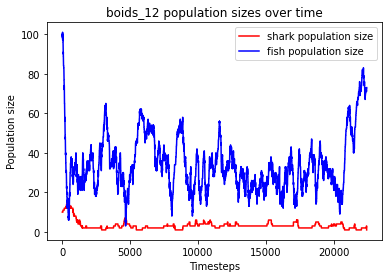

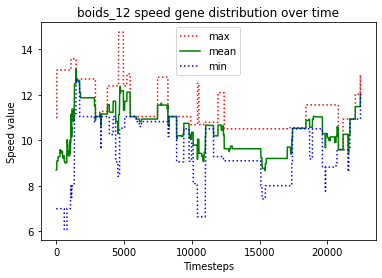

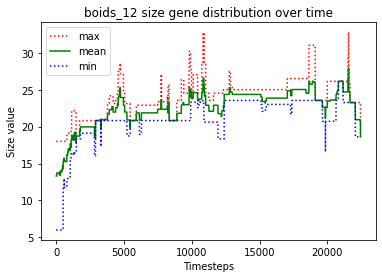

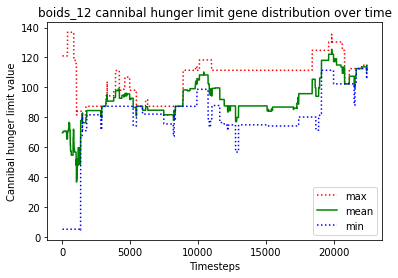

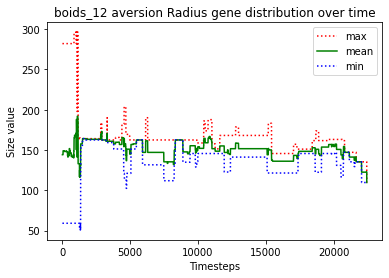

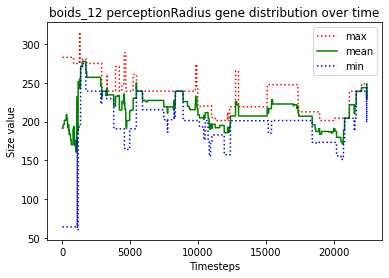

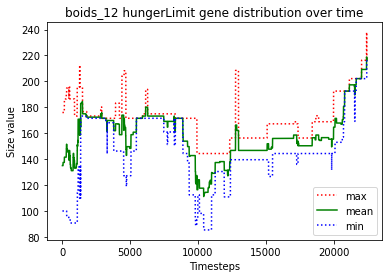





						BOIDS_13

predator_8 just gave birth to predator_10
predator_8 just gave birth to predator_11
predator_11 starved to death
predator_7 ate the carcass of predator_11_carcass
predator_1 just gave birth to predator_12
predator_6 just gave birth to predator_13
predator_8 starved to death
predator_13 ate the carcass of predator_8_carcass
predator_9 starved to death
predator_0 ate the carcass of predator_9_carcass
predator_10 starved to death
predator_3 ate the carcass of predator_10_carcass
predator_7 just gave birth to predator_14
predator_13 just gave birth to predator_15
predator_0 just gave birth to predator_16
predator_5 starved to death
predator_1 ate the carcass of predator_5_carcass
predator_7 starved to death
predator_2 ate the carcass of predator_7_carcass
predator_4 just gave birth to predator_17
predator_6 starved to death
predator_14 starved to death
predator_2 ate the carcass of predator_14_carcass
predator_13 starved to death
predator_0 ate the carcass of predator_1

predator_66 ate the carcass of predator_65_carcass
predator_63 just gave birth to predator_67
predator_67 starved to death
predator_49 just gave birth to predator_68
predator_41 ate the carcass of predator_67_carcass
predator_41 just gave birth to predator_69
predator_63 just gave birth to predator_70
predator_63 starved to death
predator_70 starved to death
predator_55 ate the carcass of predator_63_carcass
predator_68 ate the carcass of predator_70_carcass
predator_55 just gave birth to predator_71
predator_41 just gave birth to predator_72
predator_72 starved to death
predator_71 ate the carcass of predator_72_carcass
predator_41 starved to death
predator_71 ate the carcass of predator_41_carcass
predator_55 just gave birth to predator_73
predator_55 killed predator_73
predator_71 starved to death
predator_68 just gave birth to predator_74
predator_74 ate the carcass of predator_71_carcass
predator_66 just gave birth to predator_75
predator_55 starved to death
predator_75 ate the ca

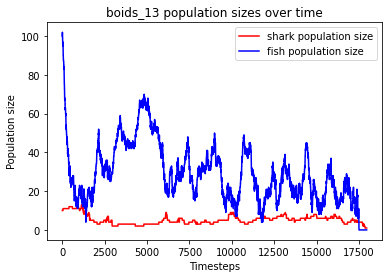

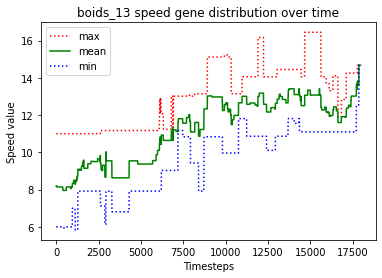

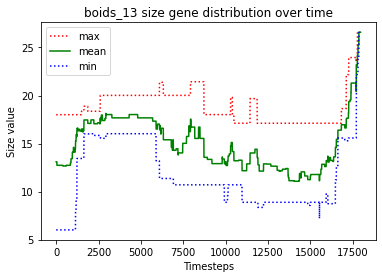

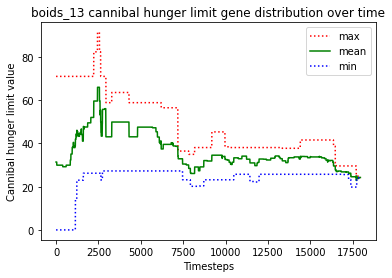

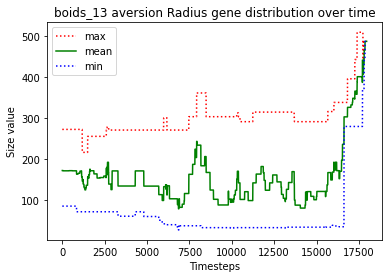

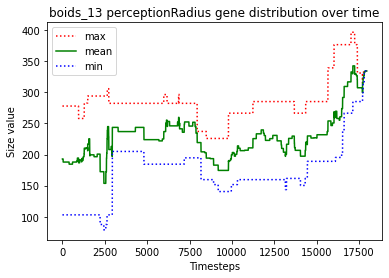

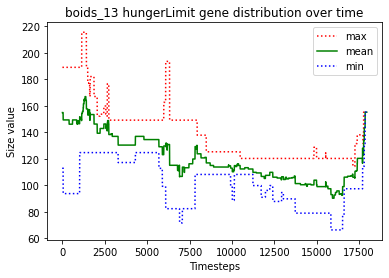





						BOIDS_14

predator_7 just gave birth to predator_10
predator_1 just gave birth to predator_11
predator_7 just gave birth to predator_12
predator_12 just gave birth to predator_13
predator_13 starved to death
predator_7 ate the carcass of predator_13_carcass
predator_12 starved to death
predator_0 just gave birth to predator_14
predator_7 starved to death
predator_10 starved to death
predator_2 ate the carcass of predator_7_carcass
predator_8 ate the carcass of predator_12_carcass
predator_11 just gave birth to predator_15
predator_15 starved to death
predator_1 starved to death
predator_11 starved to death
predator_2 ate the carcass of predator_10_carcass
predator_8 ate the carcass of predator_11_carcass
predator_8 ate the carcass of predator_15_carcass
predator_2 ate the carcass of predator_1_carcass
predator_2 just gave birth to predator_16
predator_6 killed predator_16
predator_0 starved to death
predator_9 ate the carcass of predator_0_carcass
predator_14 starved to death

predator_69 starved to death
predator_68 starved to death
predator_64 ate the carcass of predator_68_carcass
predator_64 ate the carcass of predator_69_carcass
predator_58 just gave birth to predator_70
predator_70 just gave birth to predator_71
predator_71 killed predator_65
predator_48 just gave birth to predator_72
predator_71 starved to death
predator_58 ate the carcass of predator_71_carcass
predator_72 just gave birth to predator_73
predator_72 killed predator_67
predator_70 just gave birth to predator_74
predator_70 killed predator_74
predator_64 just gave birth to predator_75
predator_58 just gave birth to predator_76
predator_48 starved to death
predator_76 ate the carcass of predator_48_carcass
predator_70 starved to death
predator_72 starved to death
predator_58 ate the carcass of predator_70_carcass
predator_73 starved to death
predator_75 ate the carcass of predator_72_carcass
predator_58 just gave birth to predator_77
predator_77 ate the carcass of predator_73_carcass
pre

predator_127 starved to death
predator_118 ate the carcass of predator_127_carcass
predator_124 just gave birth to predator_129
predator_118 just gave birth to predator_130
predator_122 just gave birth to predator_131
predator_124 starved to death
predator_122 ate the carcass of predator_124_carcass
predator_129 just gave birth to predator_132
predator_132 starved to death
predator_118 ate the carcass of predator_132_carcass
predator_130 starved to death
predator_118 ate the carcass of predator_130_carcass
predator_129 just gave birth to predator_133
predator_131 just gave birth to predator_134
predator_129 starved to death
predator_118 starved to death
predator_122 ate the carcass of predator_129_carcass
predator_133 starved to death
predator_134 ate the carcass of predator_133_carcass
predator_134 ate the carcass of predator_118_carcass
predator_134 just gave birth to predator_135
predator_135 just gave birth to predator_136
predator_136 just gave birth to predator_137
predator_135 s

predator_173 just gave birth to predator_187
predator_173 killed predator_187
predator_163 just gave birth to predator_188
predator_186 just gave birth to predator_189
predator_188 starved to death
predator_163 ate the carcass of predator_188_carcass
predator_185 just gave birth to predator_190
predator_185 killed predator_190
predator_179 starved to death
predator_189 just gave birth to predator_191
predator_163 ate the carcass of predator_179_carcass
predator_189 just gave birth to predator_192
predator_191 starved to death
predator_189 starved to death
predator_163 ate the carcass of predator_189_carcass
predator_192 starved to death
predator_163 ate the carcass of predator_192_carcass
predator_185 just gave birth to predator_193
predator_185 ate the carcass of predator_191_carcass
predator_193 killed predator_186
predator_173 starved to death
predator_185 just gave birth to predator_194
predator_185 ate the carcass of predator_173_carcass
predator_194 just gave birth to predator_19

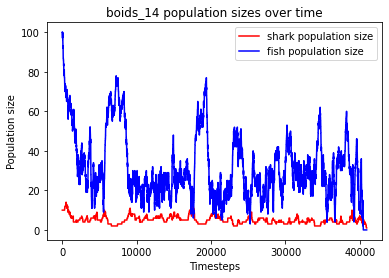

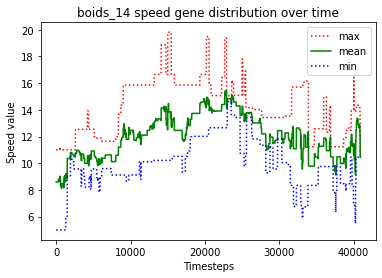

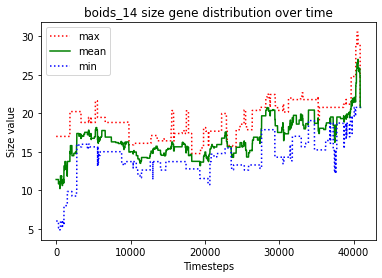

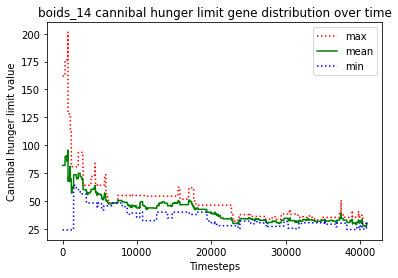

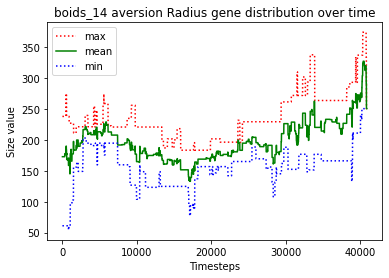

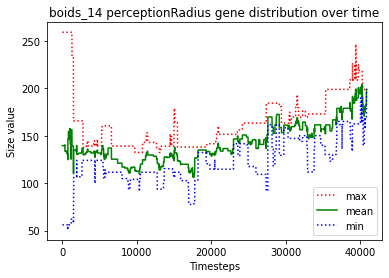

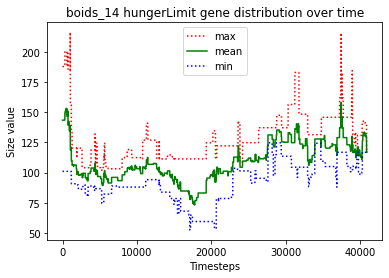





						BOIDS_15

predator_5 just gave birth to predator_10
predator_1 just gave birth to predator_11
predator_11 killed predator_0
predator_6 just gave birth to predator_12
predator_1 just gave birth to predator_13
predator_9 just gave birth to predator_14
predator_8 just gave birth to predator_15
predator_1 starved to death
predator_13 starved to death
predator_3 ate the carcass of predator_1_carcass
predator_15 ate the carcass of predator_13_carcass
predator_11 starved to death
predator_3 just gave birth to predator_16
predator_12 ate the carcass of predator_11_carcass
predator_6 starved to death
predator_2 ate the carcass of predator_6_carcass
predator_12 starved to death
predator_3 starved to death
predator_16 ate the carcass of predator_3_carcass
predator_15 starved to death
predator_9 starved to death
predator_4 ate the carcass of predator_12_carcass
predator_14 starved to death
predator_7 ate the carcass of predator_14_carcass
predator_8 starved to death
predator_5 ate the ca

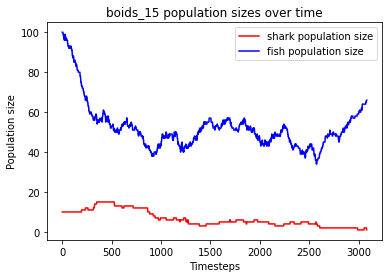

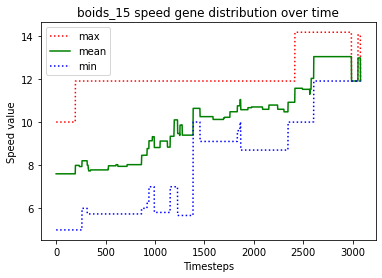

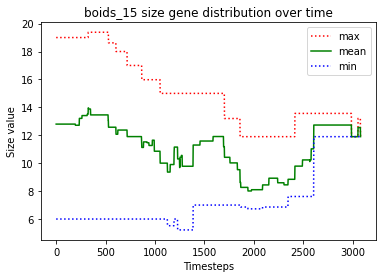

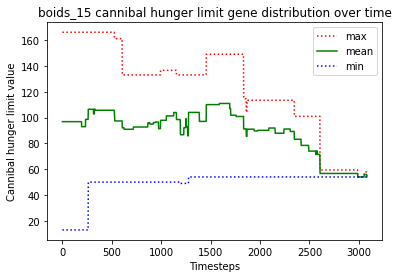

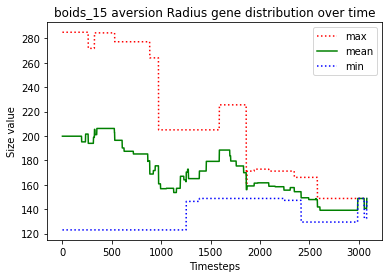

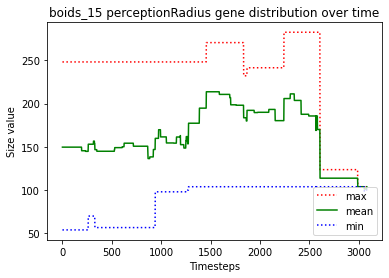

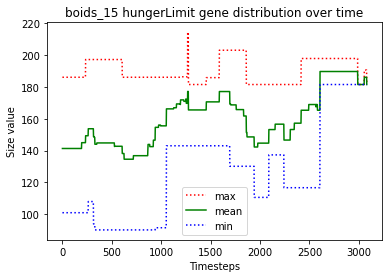





						BOIDS_16

predator_3 just gave birth to predator_10
predator_7 just gave birth to predator_11
predator_0 just gave birth to predator_12
predator_5 just gave birth to predator_13
predator_6 just gave birth to predator_14
predator_9 just gave birth to predator_15
predator_11 starved to death
predator_8 ate the carcass of predator_11_carcass
predator_7 starved to death
predator_14 ate the carcass of predator_7_carcass
predator_12 starved to death
predator_4 ate the carcass of predator_12_carcass
predator_0 starved to death
predator_2 ate the carcass of predator_0_carcass
predator_3 starved to death
predator_14 ate the carcass of predator_3_carcass
predator_1 just gave birth to predator_16
predator_6 starved to death
predator_10 starved to death
predator_16 ate the carcass of predator_10_carcass
predator_14 starved to death
predator_9 starved to death
predator_8 ate the carcass of predator_14_carcass
predator_2 ate the carcass of predator_6_carcass
predator_4 ate the carcass of p

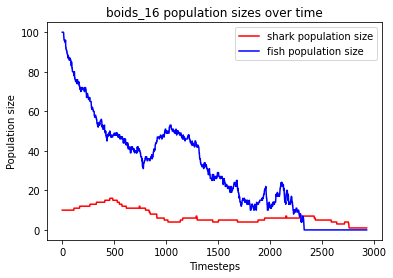

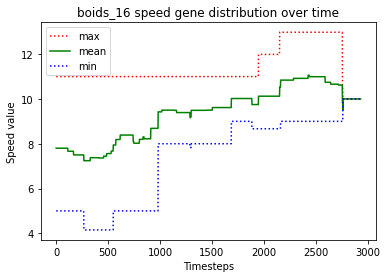

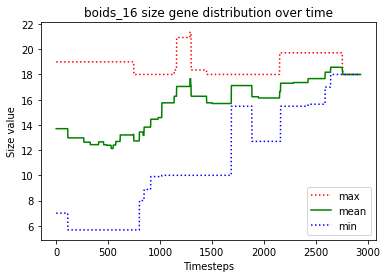

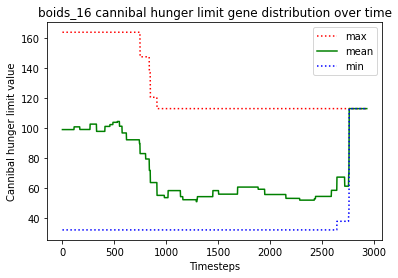

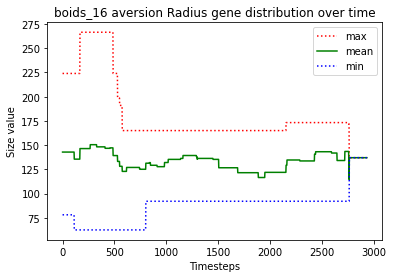

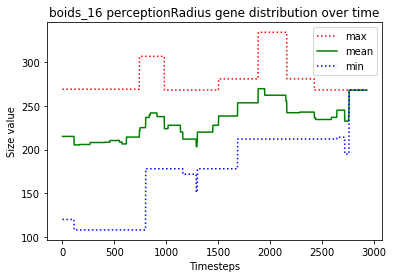

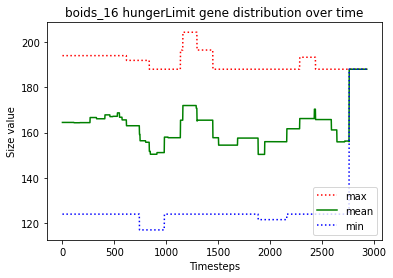





						BOIDS_17

predator_1 just gave birth to predator_10
predator_8 just gave birth to predator_11
predator_3 just gave birth to predator_12
predator_10 just gave birth to predator_13
predator_1 just gave birth to predator_14
predator_10 killed predator_4
predator_10 killed predator_6
predator_2 just gave birth to predator_15
predator_11 just gave birth to predator_16
predator_15 just gave birth to predator_17
predator_15 just gave birth to predator_18
predator_10 just gave birth to predator_19
predator_15 starved to death
predator_12 just gave birth to predator_20
predator_18 ate the carcass of predator_15_carcass
predator_9 just gave birth to predator_21
predator_12 starved to death
predator_20 starved to death
predator_14 ate the carcass of predator_12_carcass
predator_3 just gave birth to predator_22
predator_1 ate the carcass of predator_20_carcass
predator_17 starved to death
predator_11 starved to death
predator_18 starved to death
predator_22 ate the carcass of predator_17

predator_68 just gave birth to predator_71
predator_69 just gave birth to predator_72
predator_68 starved to death
predator_55 ate the carcass of predator_68_carcass
predator_67 just gave birth to predator_73
predator_55 just gave birth to predator_74
predator_73 just gave birth to predator_75
predator_75 starved to death
predator_73 starved to death
predator_69 ate the carcass of predator_75_carcass
predator_43 just gave birth to predator_76
predator_74 ate the carcass of predator_73_carcass
predator_70 just gave birth to predator_77
predator_65 just gave birth to predator_78
predator_67 starved to death
predator_74 ate the carcass of predator_67_carcass
predator_72 just gave birth to predator_79
predator_76 starved to death
predator_72 starved to death
predator_79 starved to death
predator_55 ate the carcass of predator_79_carcass
predator_69 just gave birth to predator_80
predator_74 ate the carcass of predator_76_carcass
predator_55 ate the carcass of predator_72_carcass
predator_7

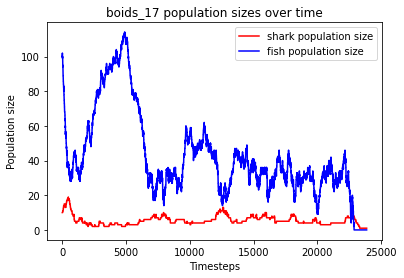

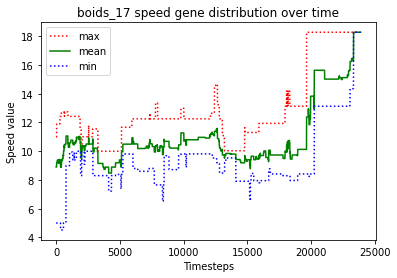

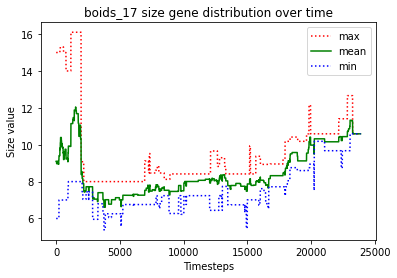

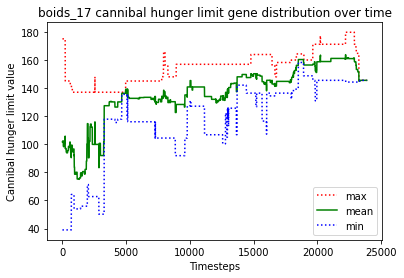

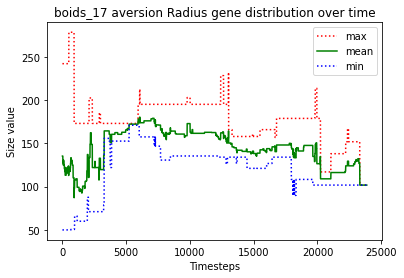

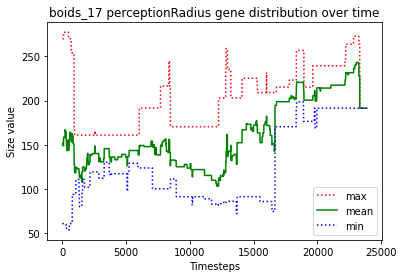

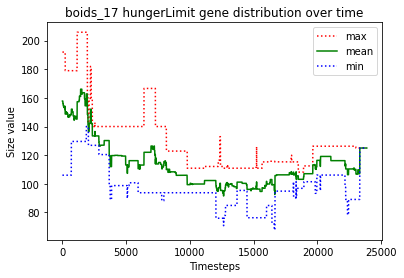





						BOIDS_18

predator_7 just gave birth to predator_10
predator_7 just gave birth to predator_11
predator_5 just gave birth to predator_12
predator_10 just gave birth to predator_13
predator_2 just gave birth to predator_14
predator_7 starved to death
predator_11 starved to death
predator_6 ate the carcass of predator_7_carcass
predator_10 ate the carcass of predator_11_carcass
predator_13 starved to death
predator_12 ate the carcass of predator_13_carcass
predator_10 starved to death
predator_2 ate the carcass of predator_10_carcass
predator_14 just gave birth to predator_15
predator_1 just gave birth to predator_16
predator_5 starved to death
predator_14 ate the carcass of predator_5_carcass
predator_12 starved to death
predator_6 ate the carcass of predator_12_carcass
predator_15 starved to death
predator_0 ate the carcass of predator_15_carcass
predator_0 just gave birth to predator_17
predator_17 just gave birth to predator_18
predator_2 just gave birth to predator_19
preda

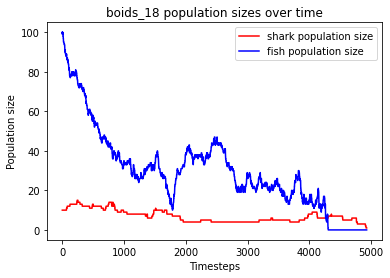

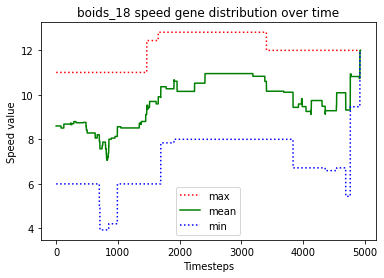

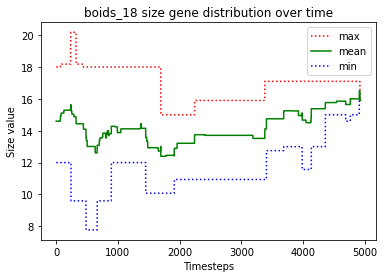

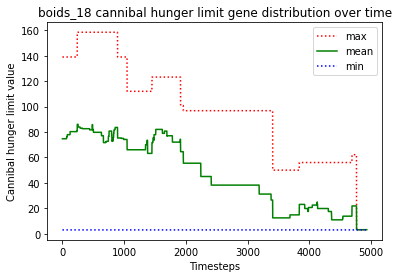

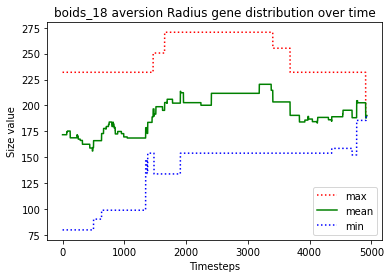

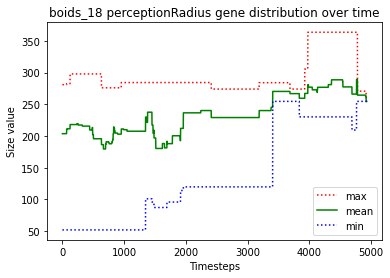

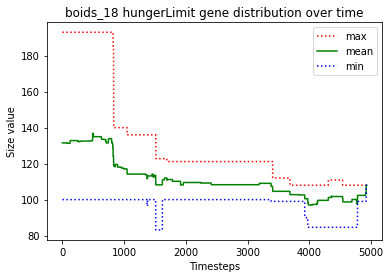





						BOIDS_19

predator_0 just gave birth to predator_10
predator_5 just gave birth to predator_11
predator_11 just gave birth to predator_12
predator_7 just gave birth to predator_13
predator_3 killed predator_2
predator_8 just gave birth to predator_14
predator_12 starved to death
predator_11 starved to death
predator_14 ate the carcass of predator_12_carcass
predator_9 ate the carcass of predator_11_carcass
predator_3 killed predator_6
predator_13 just gave birth to predator_15
predator_0 starved to death
predator_14 ate the carcass of predator_0_carcass
predator_13 starved to death
predator_15 starved to death
predator_10 ate the carcass of predator_15_carcass
predator_14 ate the carcass of predator_13_carcass
predator_8 starved to death
predator_7 ate the carcass of predator_8_carcass
predator_14 just gave birth to predator_16
predator_5 starved to death
predator_7 just gave birth to predator_17
predator_1 ate the carcass of predator_5_carcass
predator_10 just gave birth to p

predator_67 just gave birth to predator_68
predator_68 starved to death
predator_67 starved to death
predator_64 ate the carcass of predator_67_carcass
predator_60 ate the carcass of predator_68_carcass
predator_65 starved to death
predator_60 just gave birth to predator_69
predator_60 ate the carcass of predator_65_carcass
predator_64 just gave birth to predator_70
predator_64 starved to death
predator_70 starved to death
predator_60 ate the carcass of predator_64_carcass
predator_60 just gave birth to predator_71
predator_60 ate the carcass of predator_70_carcass
predator_60 just gave birth to predator_72
predator_72 killed predator_69
predator_71 just gave birth to predator_73
predator_73 killed predator_60
predator_71 just gave birth to predator_74
predator_73 starved to death
predator_72 ate the carcass of predator_73_carcass
predator_74 just gave birth to predator_75
predator_71 just gave birth to predator_76
predator_76 starved to death
predator_72 ate the carcass of predator_76

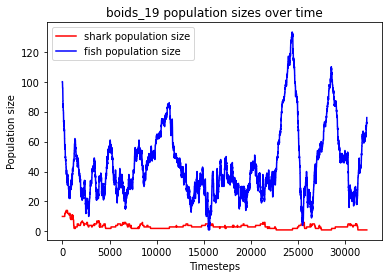

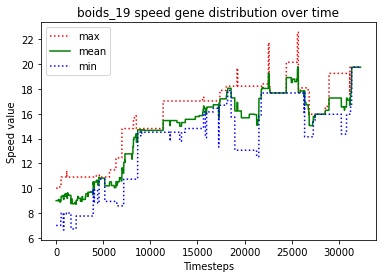

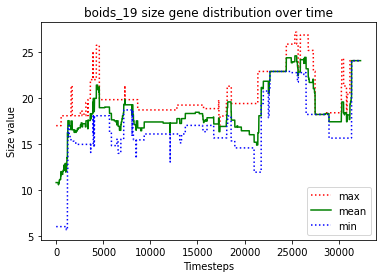

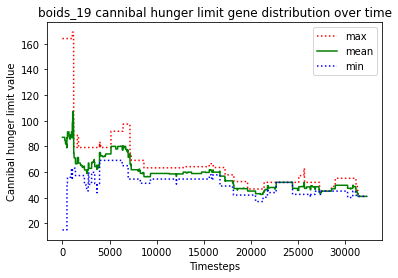

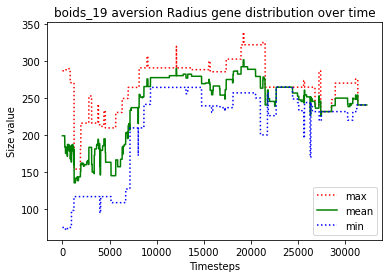

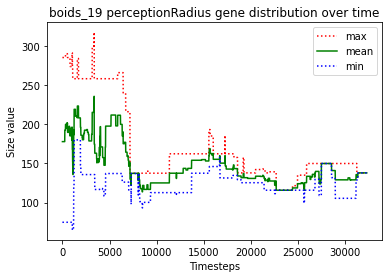

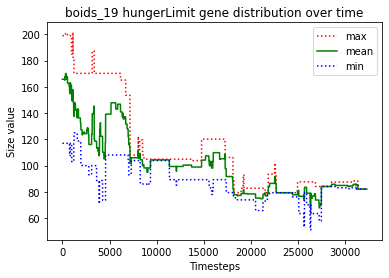





						BOIDS_20

predator_6 just gave birth to predator_10
predator_10 just gave birth to predator_11
predator_2 just gave birth to predator_12
predator_10 just gave birth to predator_13
predator_13 starved to death
predator_10 ate the carcass of predator_13_carcass
predator_11 starved to death
predator_10 ate the carcass of predator_11_carcass
predator_10 starved to death
predator_7 ate the carcass of predator_10_carcass
predator_7 just gave birth to predator_14
predator_6 starved to death
predator_3 just gave birth to predator_15
predator_8 ate the carcass of predator_6_carcass
predator_3 just gave birth to predator_16
predator_16 starved to death
predator_3 starved to death
predator_15 starved to death
predator_0 ate the carcass of predator_16_carcass
predator_0 ate the carcass of predator_3_carcass
predator_4 just gave birth to predator_17
predator_9 just gave birth to predator_18
predator_7 starved to death
predator_2 just gave birth to predator_19
predator_4 just gave birth to

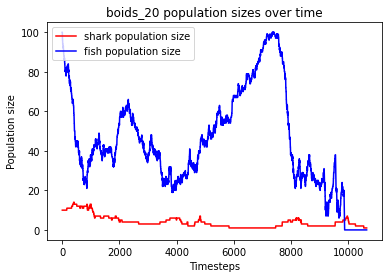

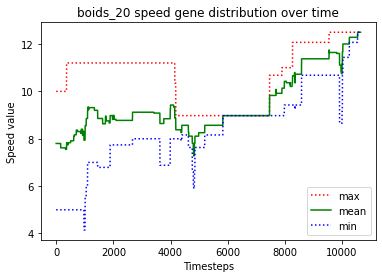

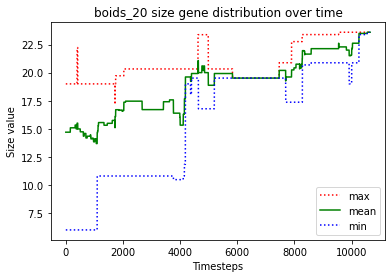

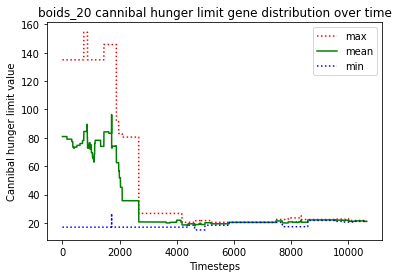

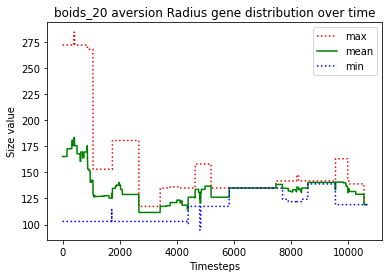

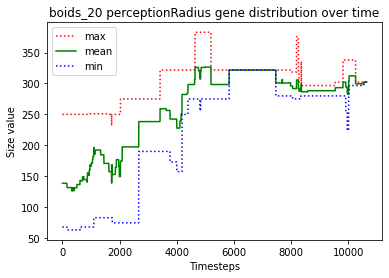

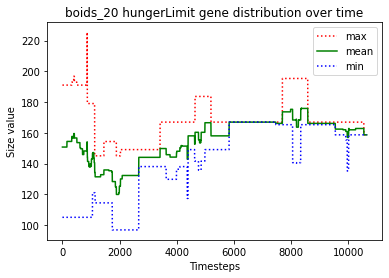





						BOIDS_21

predator_2 just gave birth to predator_10
predator_10 just gave birth to predator_11
predator_7 just gave birth to predator_12
predator_5 just gave birth to predator_13
predator_4 just gave birth to predator_14
predator_3 just gave birth to predator_15
predator_10 killed predator_5
predator_11 starved to death
predator_8 ate the carcass of predator_11_carcass
predator_4 just gave birth to predator_16
predator_2 starved to death
predator_8 ate the carcass of predator_2_carcass
predator_12 just gave birth to predator_17
predator_17 killed predator_3
predator_17 killed predator_13
predator_16 starved to death
predator_15 starved to death
predator_4 ate the carcass of predator_16_carcass
predator_9 ate the carcass of predator_15_carcass
predator_10 starved to death
predator_17 starved to death
predator_9 ate the carcass of predator_10_carcass
predator_14 starved to death
predator_6 ate the carcass of predator_14_carcass
predator_7 killed predator_1
predator_9 ate the ca

predator_53 ate the carcass of predator_68_carcass
predator_58 just gave birth to predator_69
predator_69 ate the carcass of predator_67_carcass
predator_58 ate the carcass of predator_66_carcass
predator_37 just gave birth to predator_70
predator_69 just gave birth to predator_71
predator_70 just gave birth to predator_72
predator_72 starved to death
predator_53 just gave birth to predator_73
predator_70 starved to death
predator_58 just gave birth to predator_74
predator_69 ate the carcass of predator_70_carcass
predator_53 ate the carcass of predator_72_carcass
predator_37 starved to death
predator_53 ate the carcass of predator_37_carcass
predator_69 starved to death
predator_71 ate the carcass of predator_69_carcass
predator_58 just gave birth to predator_75
predator_58 killed predator_75
no fish to move
predator_53 just gave birth to predator_76
predator_74 just gave birth to predator_77
predator_73 just gave birth to predator_78
predator_71 just gave birth to predator_79
predato

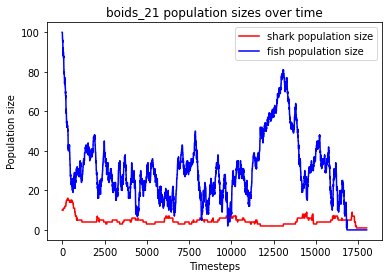

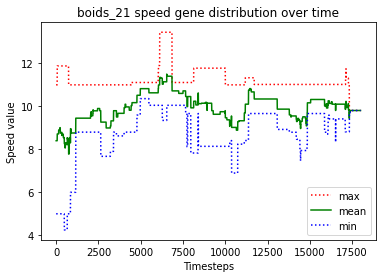

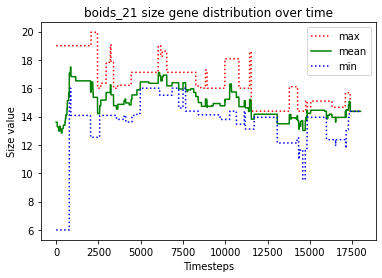

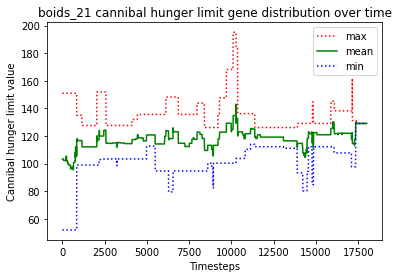

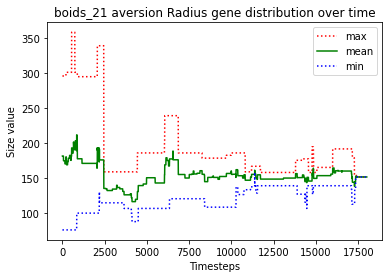

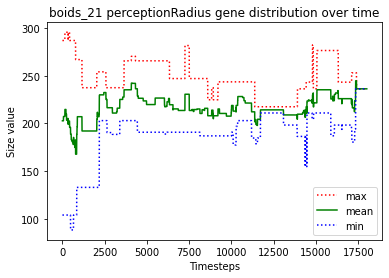

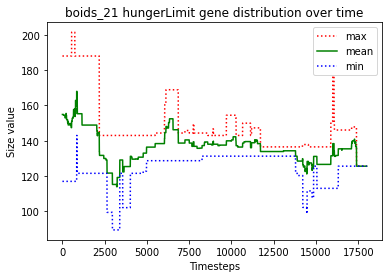





						BOIDS_22

predator_0 just gave birth to predator_10
predator_2 just gave birth to predator_11
predator_1 just gave birth to predator_12
predator_1 killed predator_6
predator_2 just gave birth to predator_13
predator_12 just gave birth to predator_14
predator_11 just gave birth to predator_15
predator_14 starved to death
predator_13 starved to death
predator_15 ate the carcass of predator_14_carcass
predator_0 ate the carcass of predator_13_carcass
predator_2 starved to death
predator_1 just gave birth to predator_16
predator_11 starved to death
predator_1 ate the carcass of predator_2_carcass
predator_10 ate the carcass of predator_11_carcass
predator_9 just gave birth to predator_17
predator_15 starved to death
predator_12 starved to death
predator_1 ate the carcass of predator_15_carcass
predator_8 just gave birth to predator_18
predator_8 ate the carcass of predator_12_carcass
predator_18 just gave birth to predator_19
predator_10 starved to death
predator_4 ate the carcas

predator_43 ate the carcass of predator_58_carcass
predator_63 starved to death
predator_43 ate the carcass of predator_63_carcass
predator_61 just gave birth to predator_66
predator_66 just gave birth to predator_67
predator_53 just gave birth to predator_68
predator_66 starved to death
predator_53 just gave birth to predator_69
predator_67 ate the carcass of predator_66_carcass
predator_67 starved to death
predator_43 ate the carcass of predator_67_carcass
predator_61 just gave birth to predator_70
predator_64 just gave birth to predator_71
predator_64 killed predator_68
predator_53 starved to death
predator_43 ate the carcass of predator_53_carcass
predator_69 just gave birth to predator_72
predator_69 just gave birth to predator_73
predator_70 starved to death
predator_72 ate the carcass of predator_70_carcass
predator_71 just gave birth to predator_74
predator_73 starved to death
predator_72 ate the carcass of predator_73_carcass
predator_74 killed predator_43
predator_61 starved 

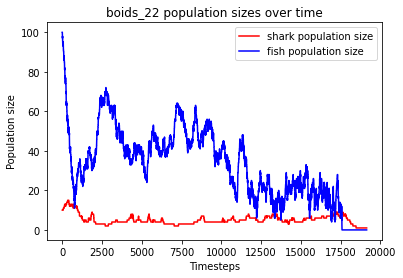

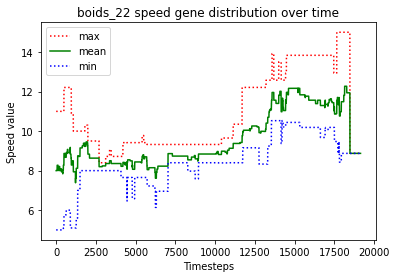

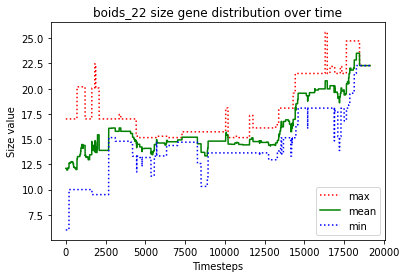

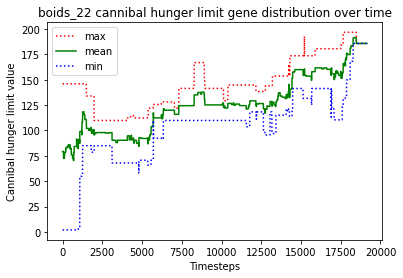

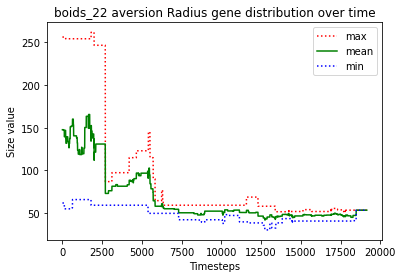

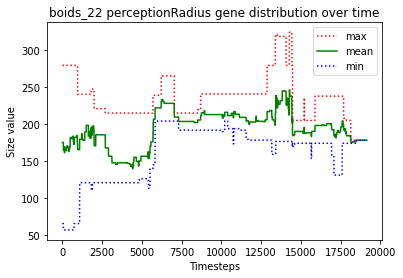

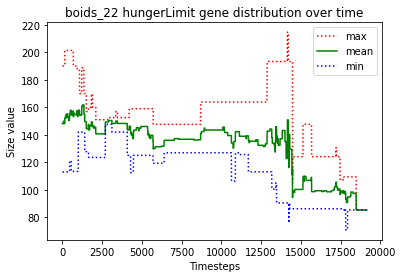





						BOIDS_23

predator_6 just gave birth to predator_10
predator_7 just gave birth to predator_11
predator_4 just gave birth to predator_12
predator_12 just gave birth to predator_13
predator_4 killed predator_8
predator_4 killed predator_2
predator_6 starved to death
predator_3 ate the carcass of predator_6_carcass
predator_4 killed predator_1
predator_13 starved to death
predator_12 starved to death
predator_10 ate the carcass of predator_13_carcass
predator_7 ate the carcass of predator_12_carcass
predator_10 starved to death
predator_4 killed predator_11
predator_3 ate the carcass of predator_10_carcass
predator_4 killed predator_5
predator_4 killed predator_0
predator_7 starved to death
predator_4 ate the carcass of predator_7_carcass
predator_3 just gave birth to predator_14
predator_4 killed predator_3
predator_4 killed predator_14
predator_9 just gave birth to predator_15
predator_15 starved to death
predator_9 ate the carcass of predator_15_carcass
predator_4 just gave b

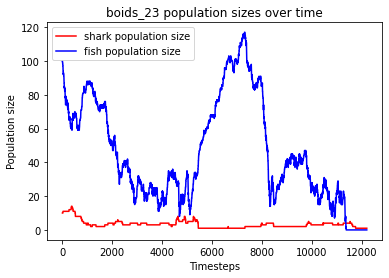

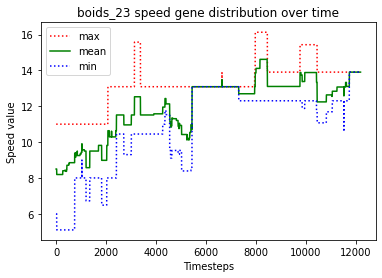

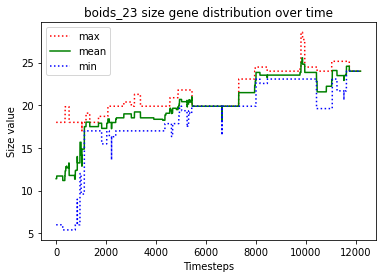

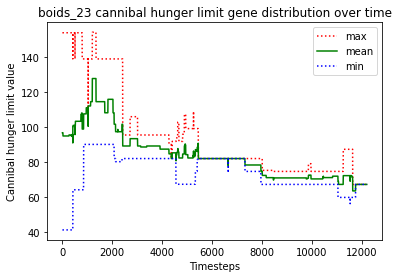

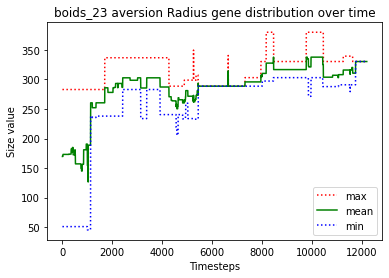

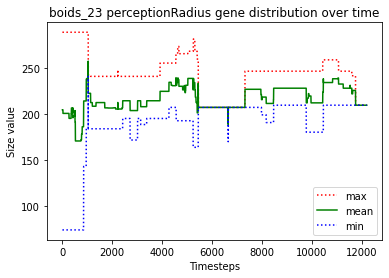

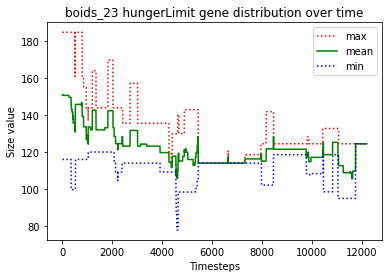





						BOIDS_24

predator_6 just gave birth to predator_10
predator_0 just gave birth to predator_11
predator_1 just gave birth to predator_12
predator_10 just gave birth to predator_13
predator_8 killed predator_9
predator_6 just gave birth to predator_14
predator_10 just gave birth to predator_15
predator_10 starved to death
predator_15 starved to death
predator_11 ate the carcass of predator_10_carcass
predator_13 starved to death
predator_4 ate the carcass of predator_13_carcass
predator_6 starved to death
predator_7 ate the carcass of predator_15_carcass
predator_14 starved to death
predator_1 ate the carcass of predator_6_carcass
predator_1 just gave birth to predator_16
predator_16 ate the carcass of predator_14_carcass
predator_4 just gave birth to predator_17
predator_2 just gave birth to predator_18
predator_1 starved to death
predator_17 ate the carcass of predator_1_carcass
predator_16 starved to death
predator_17 ate the carcass of predator_16_carcass
predator_12 starve

predator_64 starved to death
predator_61 ate the carcass of predator_64_carcass
predator_61 just gave birth to predator_66
predator_48 just gave birth to predator_67
predator_65 just gave birth to predator_68
predator_68 starved to death
predator_65 just gave birth to predator_69
predator_65 starved to death
predator_69 starved to death
predator_48 ate the carcass of predator_65_carcass
predator_61 ate the carcass of predator_69_carcass
predator_61 ate the carcass of predator_68_carcass
predator_48 just gave birth to predator_70
predator_70 killed predator_61
predator_66 just gave birth to predator_71
predator_67 starved to death
predator_48 starved to death
predator_70 starved to death
predator_71 ate the carcass of predator_70_carcass
predator_71 ate the carcass of predator_48_carcass
predator_66 ate the carcass of predator_67_carcass
predator_66 just gave birth to predator_72
predator_66 starved to death
predator_71 ate the carcass of predator_66_carcass
predator_72 starved to death

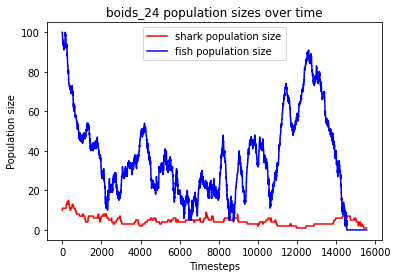

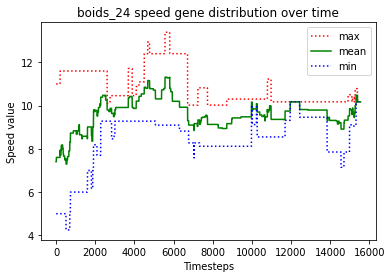

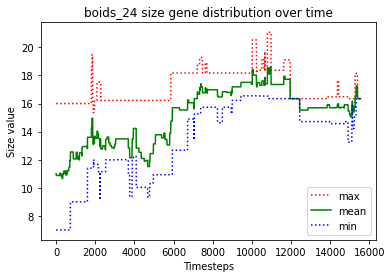

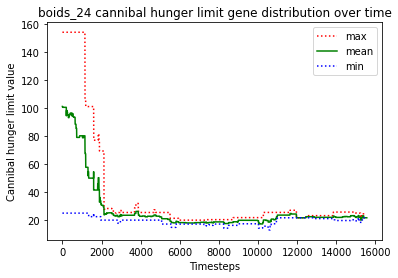

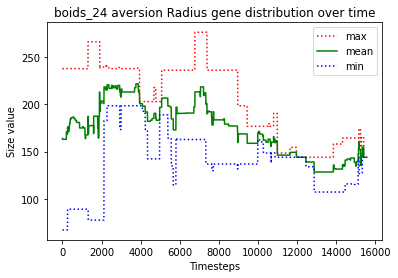

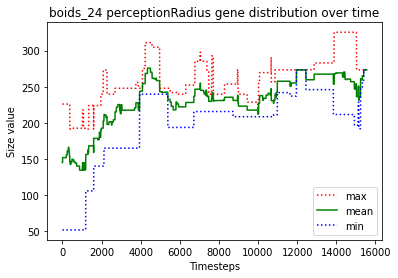

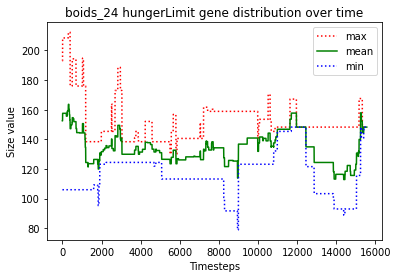





						SOLO_0

predator_1 just gave birth to predator_10
predator_3 just gave birth to predator_11
predator_7 just gave birth to predator_12
predator_0 just gave birth to predator_13
predator_1 just gave birth to predator_14
predator_13 just gave birth to predator_15
predator_10 starved to death
predator_4 ate the carcass of predator_10_carcass
predator_3 just gave birth to predator_16
predator_3 starved to death
predator_16 ate the carcass of predator_3_carcass
predator_7 starved to death
predator_1 ate the carcass of predator_7_carcass
predator_12 starved to death
predator_15 ate the carcass of predator_12_carcass
predator_11 starved to death
predator_0 just gave birth to predator_17
predator_16 starved to death
predator_1 ate the carcass of predator_16_carcass
predator_13 just gave birth to predator_18
predator_1 ate the carcass of predator_11_carcass
predator_14 starved to death
predator_13 ate the carcass of predator_14_carcass
predator_4 just gave birth to predator_19
predator

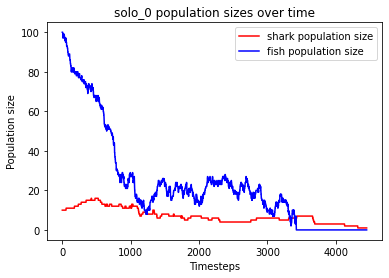

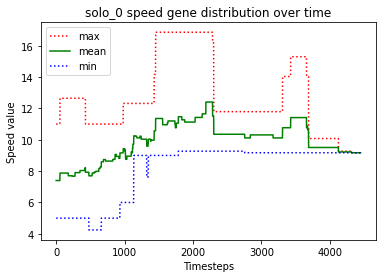

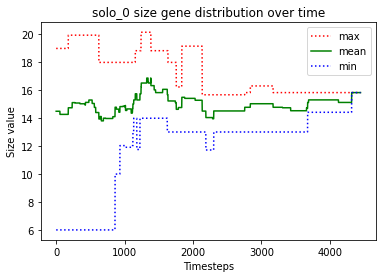

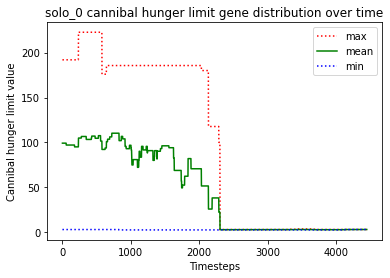

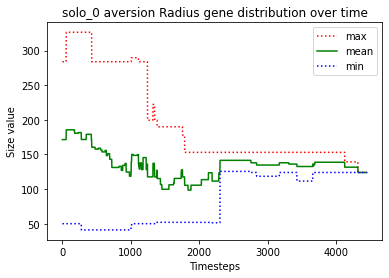

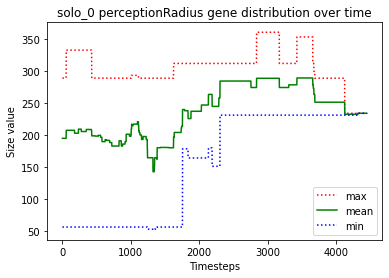

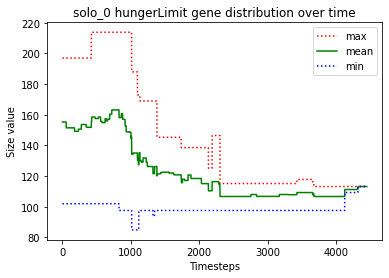





						SOLO_1

predator_3 just gave birth to predator_10
predator_10 just gave birth to predator_11
predator_7 just gave birth to predator_12
predator_12 just gave birth to predator_13
predator_8 just gave birth to predator_14
predator_12 starved to death
predator_1 ate the carcass of predator_12_carcass
predator_13 starved to death
predator_7 ate the carcass of predator_13_carcass
predator_11 starved to death
predator_8 just gave birth to predator_15
predator_7 ate the carcass of predator_11_carcass
predator_3 starved to death
predator_8 ate the carcass of predator_3_carcass
predator_9 just gave birth to predator_16
predator_9 killed predator_10
predator_15 starved to death
predator_8 ate the carcass of predator_15_carcass
predator_16 just gave birth to predator_17
predator_16 starved to death
predator_14 starved to death
predator_17 starved to death
predator_7 ate the carcass of predator_17_carcass
predator_4 ate the carcass of predator_14_carcass
predator_7 starved to death
preda

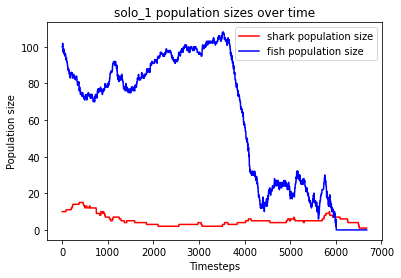

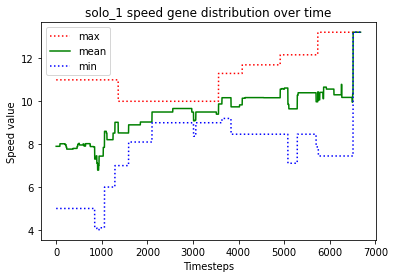

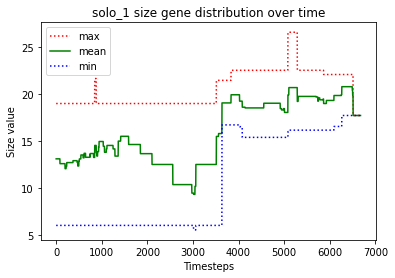

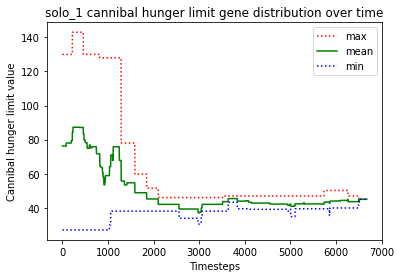

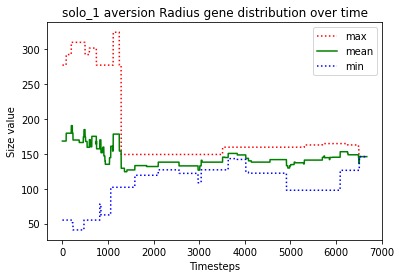

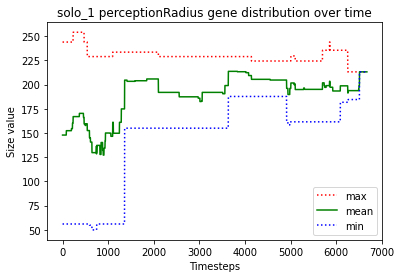

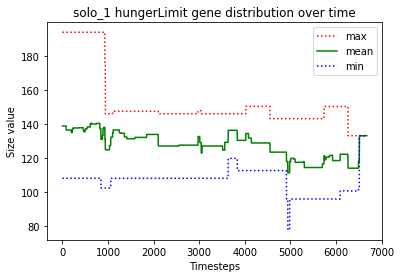





						SOLO_2

predator_8 just gave birth to predator_10
predator_2 just gave birth to predator_11
predator_11 just gave birth to predator_12
predator_12 starved to death
predator_7 just gave birth to predator_13
predator_11 starved to death
predator_3 ate the carcass of predator_11_carcass
predator_0 just gave birth to predator_14
predator_2 ate the carcass of predator_12_carcass
predator_10 starved to death
predator_3 just gave birth to predator_15
predator_9 ate the carcass of predator_10_carcass
predator_8 starved to death
predator_9 just gave birth to predator_16
predator_2 starved to death
predator_0 ate the carcass of predator_8_carcass
predator_6 ate the carcass of predator_2_carcass
predator_4 killed predator_7
predator_15 just gave birth to predator_17
predator_13 starved to death
predator_9 ate the carcass of predator_13_carcass
predator_15 starved to death
predator_0 ate the carcass of predator_15_carcass
predator_9 just gave birth to predator_18
predator_1 just gave bir

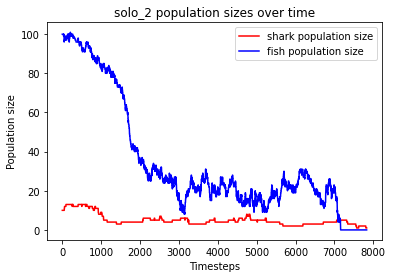

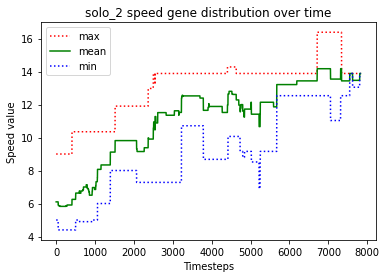

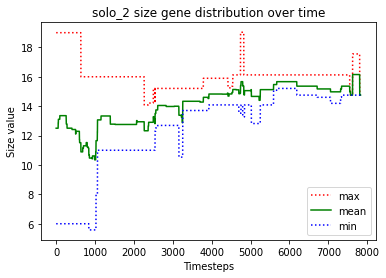

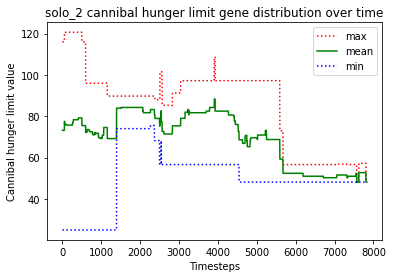

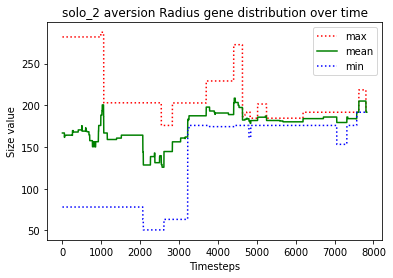

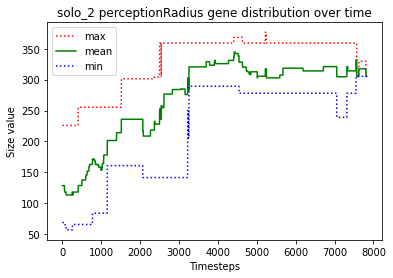

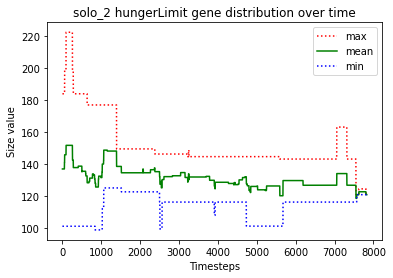





						SOLO_3

predator_9 just gave birth to predator_10
predator_7 just gave birth to predator_11
predator_8 just gave birth to predator_12
predator_3 just gave birth to predator_13
predator_7 killed predator_9
predator_4 just gave birth to predator_14
predator_11 just gave birth to predator_15
predator_15 starved to death
predator_11 starved to death
predator_10 starved to death
predator_2 ate the carcass of predator_11_carcass
predator_6 ate the carcass of predator_10_carcass
predator_1 ate the carcass of predator_15_carcass
predator_13 just gave birth to predator_16
predator_3 just gave birth to predator_17
predator_13 starved to death
predator_3 starved to death
predator_17 starved to death
predator_8 starved to death
predator_16 starved to death
predator_12 ate the carcass of predator_8_carcass
predator_6 ate the carcass of predator_3_carcass
predator_14 ate the carcass of predator_17_carcass
predator_0 ate the carcass of predator_13_carcass
predator_7 just gave birth to preda

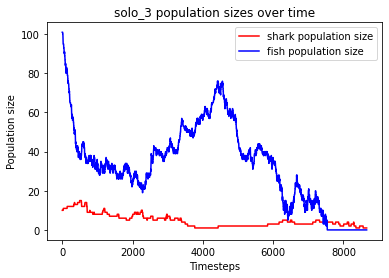

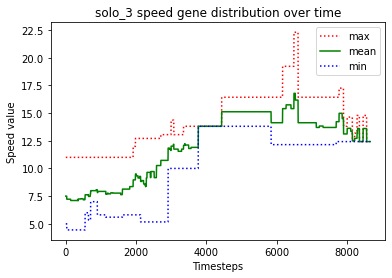

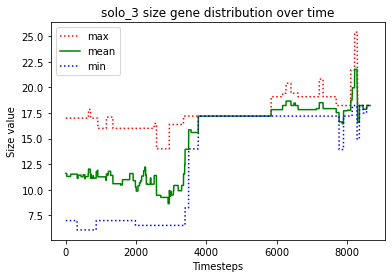

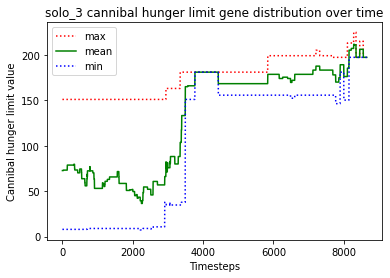

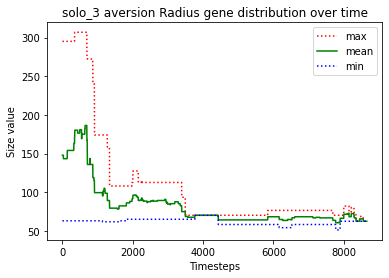

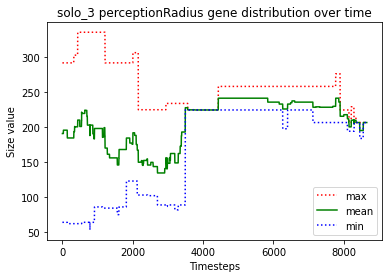

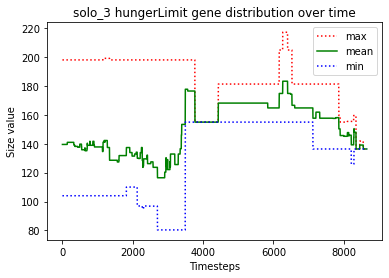





						SOLO_4

predator_0 just gave birth to predator_10
predator_3 just gave birth to predator_11
predator_10 just gave birth to predator_12
predator_0 starved to death
predator_10 ate the carcass of predator_0_carcass
predator_12 starved to death
predator_4 ate the carcass of predator_12_carcass
predator_10 starved to death
predator_4 ate the carcass of predator_10_carcass
predator_5 just gave birth to predator_13
predator_8 just gave birth to predator_14
predator_3 just gave birth to predator_15
predator_2 just gave birth to predator_16
predator_15 starved to death
predator_7 ate the carcass of predator_15_carcass
predator_3 starved to death
predator_5 just gave birth to predator_17
predator_4 ate the carcass of predator_3_carcass
predator_17 starved to death
predator_6 ate the carcass of predator_17_carcass
predator_5 starved to death
predator_13 ate the carcass of predator_5_carcass
predator_4 just gave birth to predator_18
predator_8 just gave birth to predator_19
predator_13 

predator_54 starved to death
predator_65 just gave birth to predator_70
predator_62 ate the carcass of predator_54_carcass
predator_65 starved to death
predator_70 starved to death
predator_62 just gave birth to predator_71
predator_68 ate the carcass of predator_70_carcass
predator_68 ate the carcass of predator_65_carcass
predator_68 just gave birth to predator_72
predator_72 killed predator_71
predator_68 starved to death
predator_48 ate the carcass of predator_68_carcass
predator_72 killed predator_48
predator_72 starved to death
predator_36 ate the carcass of predator_72_carcass
predator_35 just gave birth to predator_73
predator_35 just gave birth to predator_74
predator_74 starved to death
predator_62 ate the carcass of predator_74_carcass
predator_62 just gave birth to predator_75
predator_75 just gave birth to predator_76
predator_62 just gave birth to predator_77
predator_73 just gave birth to predator_78
predator_77 just gave birth to predator_79
predator_75 starved to death

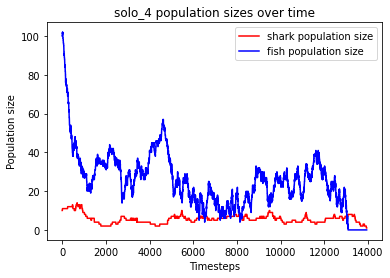

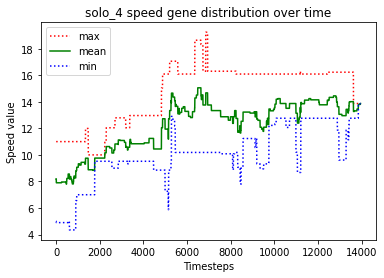

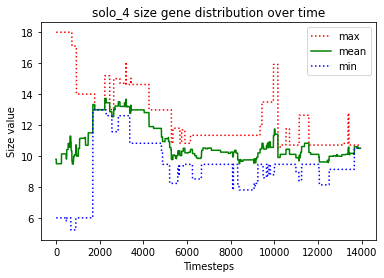

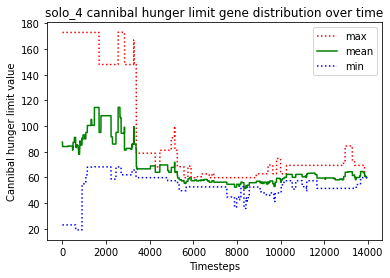

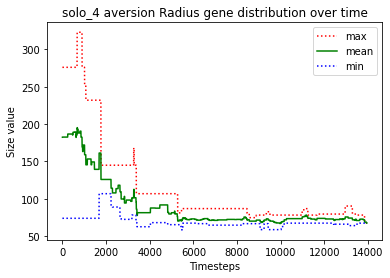

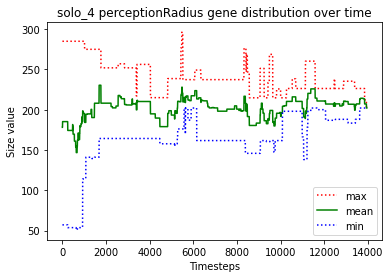

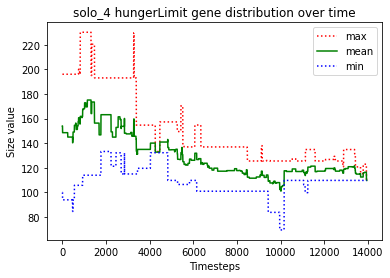





						SOLO_5

predator_9 just gave birth to predator_10
predator_0 just gave birth to predator_11
predator_10 starved to death
predator_4 ate the carcass of predator_10_carcass
predator_9 starved to death
predator_11 ate the carcass of predator_9_carcass
predator_11 starved to death
predator_1 ate the carcass of predator_11_carcass
predator_8 starved to death
predator_2 just gave birth to predator_12
predator_6 ate the carcass of predator_8_carcass
predator_0 just gave birth to predator_13
predator_3 starved to death
predator_2 just gave birth to predator_14
predator_13 ate the carcass of predator_3_carcass
predator_1 starved to death
predator_14 starved to death
predator_2 starved to death
predator_12 starved to death
predator_4 ate the carcass of predator_14_carcass
predator_4 ate the carcass of predator_12_carcass
predator_13 just gave birth to predator_15
predator_4 ate the carcass of predator_2_carcass
predator_7 starved to death
predator_13 starved to death
predator_15 starve

predator_66 starved to death
predator_63 ate the carcass of predator_66_carcass
predator_63 just gave birth to predator_68
predator_68 starved to death
predator_56 ate the carcass of predator_68_carcass
predator_63 starved to death
predator_59 ate the carcass of predator_63_carcass
predator_67 killed predator_61
predator_67 just gave birth to predator_69
predator_69 killed predator_59
predator_69 just gave birth to predator_70
predator_69 just gave birth to predator_71
predator_69 starved to death
predator_71 starved to death
predator_70 starved to death
predator_56 ate the carcass of predator_69_carcass
predator_67 ate the carcass of predator_71_carcass
predator_67 ate the carcass of predator_70_carcass
predator_56 just gave birth to predator_72
predator_72 just gave birth to predator_73
predator_67 starved to death
predator_72 ate the carcass of predator_67_carcass
predator_73 just gave birth to predator_74
predator_56 just gave birth to predator_75
predator_56 just gave birth to pre

predator_125 just gave birth to predator_126
predator_117 ate the carcass of predator_124_carcass
predator_116 just gave birth to predator_127
predator_126 starved to death
predator_127 ate the carcass of predator_126_carcass
predator_127 just gave birth to predator_128
predator_128 killed predator_102
predator_125 just gave birth to predator_129
predator_129 just gave birth to predator_130
predator_128 just gave birth to predator_131
predator_130 killed predator_127
predator_130 just gave birth to predator_132
predator_125 starved to death
predator_131 killed predator_116
predator_117 ate the carcass of predator_125_carcass
predator_122 just gave birth to predator_133
predator_129 starved to death
predator_131 ate the carcass of predator_129_carcass
predator_128 just gave birth to predator_134
predator_132 starved to death
predator_131 killed predator_117
predator_131 just gave birth to predator_135
predator_122 starved to death
predator_135 starved to death
predator_134 starved to de

In [ ]:
#### CONSTANTS ####
simulation_speed = 15
max_timesteps = 100000

### NUMBER OF AGENTS
#number of boids
num_boids = 100
#number of predators
num_preds = 10

### FISH BEHAVIOUR
#radius in which the fish swarm behaviour kicks in
perception_radius = 35
#minimum radius between each fish
minimum_radius = 25
#radius in which aversion behaviour kicks in
aversion_radius = 90

### PREDATOR BEHAVIOUR
cannibal_size_limit = 1.2 # must be 20% bigger than another shark to consider eating it; was going to make this a parameter but decided against it


#### MAIN EXPERIMENT FUNCTION ####
def do_one_experiment(num_boids, perception_radius, minimum_radius, aversion_radius, num_preds, simulation_speed, max_timesteps, swarm_behavour, run_name):
    print(color.BOLD+f"\n\n\n\n\t\t\t\t\t\t{run_name.upper()}\n"+color.END)
    window = tk.Tk()
    canvas = initialise(window)
    count = Counter(max_timesteps) # run for 1000 time steps
    fishList = addFish(canvas, num_boids) ### Custom now taking num_boids as a parameter to be tuned
    predList = addPredators(canvas, num_preds) ### Custom adding preadtors
    moveFish(canvas,False, fishList, perception_radius, minimum_radius, aversion_radius, predList, simulation_speed, len(fishList), swarm_behaviour) ### Custom now taking perception and minimum radius as parameters to be tuned
    movePredators(canvas,window,count,predList, fishList, [], [], simulation_speed, len(predList), ([],[],[]), ([],[],[]), ([],[],[]), ([],[],[]), ([],[],[]), ([],[],[]), ([],[]), run_name, None, None) ### Custom moving predators
    writeTrackers(canvas, fishList, predList,count)
    window.mainloop()
    
    
#### running all experiments ####
num_of_experiments = 25
# running with and without swarm behavour
for swarm_behaviour in (True, False):
    #running n experiments for each
    for i in range(num_of_experiments):
        run_name = ""
        run_name += f'boids_{i}' if swarm_behaviour else f'solo_{i}'
        do_one_experiment(num_boids, perception_radius, minimum_radius, aversion_radius, num_preds, simulation_speed, max_timesteps, swarm_behaviour, run_name)

# Inspecting totals from the experiments

## loading the stats from experiments

In [ ]:
#loading the data for boids
boids_timesteps_passed=[]
boids_fish_extinct_timestep=[]
boids_shark_extinct_timestep=[]

boids_minMeanMax_speed=[]
boids_minMeanMax_size =[]
boids_minMeanMax_aversionRadius =[]
boids_minMeanMax_perceptionRadius =[]
boids_minMeanMax_hungerLimit =[]
boids_minMeanMax_canibalHunger =[]

boids_populationSizes=[]

for i in range(num_of_experiments):
    boids_timesteps_passed.append(pd.read_pickle(f"./boids_{i}/timesteps_passed.pickle"))
    boids_shark_extinct_timestep.append(pd.read_pickle(f"./boids_{i}/shark_extinct_timestep.pickle"))
    boids_fish_extinct_timestep.append(pd.read_pickle(f"./boids_{i}/fish_extinct_timestep.pickle"))

    boids_minMeanMax_speed.append(pd.read_pickle(f"./boids_{i}/minMeanMax_speed.pickle"))
    boids_minMeanMax_size.append(pd.read_pickle(f"./boids_{i}/minMeanMax_size.pickle"))
    boids_minMeanMax_aversionRadius.append(pd.read_pickle(f"./boids_{i}/minMeanMax_aversionRadius.pickle"))
    boids_minMeanMax_perceptionRadius.append(pd.read_pickle(f"./boids_{i}/minMeanMax_perceptionRadius.pickle"))
    boids_minMeanMax_hungerLimit.append(pd.read_pickle(f"./boids_{i}/minMeanMax_hungerLimit.pickle"))
    boids_minMeanMax_canibalHunger.append(pd.read_pickle(f"./boids_{i}/minMeanMax_canibalHunger.pickle"))
    
    boids_populationSizes.append(pd.read_pickle(f"./boids_{i}/populationSizes.pickle"))


    
    
    
#loading the data for solo
solo_timesteps_passed=[]
solo_fish_extinct_timestep=[]
solo_shark_extinct_timestep=[]

solo_minMeanMax_speed=[]
solo_minMeanMax_size =[]
solo_minMeanMax_aversionRadius =[]
solo_minMeanMax_perceptionRadius =[]
solo_minMeanMax_hungerLimit =[]
solo_minMeanMax_canibalHunger =[]

solo_populationSizes=[]

for i in range(num_of_experiments):
    solo_timesteps_passed.append(pd.read_pickle(f"./solo_{i}/timesteps_passed.pickle"))
    solo_shark_extinct_timestep.append(pd.read_pickle(f"./solo_{i}/shark_extinct_timestep.pickle"))
    solo_fish_extinct_timestep.append(pd.read_pickle(f"./solo_{i}/fish_extinct_timestep.pickle"))

    solo_minMeanMax_speed.append(pd.read_pickle(f"./solo_{i}/minMeanMax_speed.pickle"))
    solo_minMeanMax_size.append(pd.read_pickle(f"./solo_{i}/minMeanMax_size.pickle"))
    solo_minMeanMax_aversionRadius.append(pd.read_pickle(f"./solo_{i}/minMeanMax_aversionRadius.pickle"))
    solo_minMeanMax_perceptionRadius.append(pd.read_pickle(f"./solo_{i}/minMeanMax_perceptionRadius.pickle"))
    solo_minMeanMax_hungerLimit.append(pd.read_pickle(f"./solo_{i}/minMeanMax_hungerLimit.pickle"))
    solo_minMeanMax_canibalHunger.append(pd.read_pickle(f"./solo_{i}/minMeanMax_canibalHunger.pickle"))
    
    
    solo_populationSizes.append(pd.read_pickle(f"./solo_{i}/populationSizes.pickle"))

In [ ]:
#making the directories if it doesn't already exist
if not os.path.exists('_all_solo/plots'):
    os.makedirs('_all_solo/plots')
if not os.path.exists('_all_boids/plots'):
    os.makedirs('_all_boids/plots')

## Inspecting population sizes over all experiments

### Solo population sizes

In [ ]:
#getting the pred and fish popsizes
temp=pd.DataFrame(data = solo_populationSizes, columns = ["pred","fish"])
preds_popsizes = pd.DataFrame(data = temp["pred"].to_list()).replace(0, np.nan)
fish_popsizes = pd.DataFrame(data = temp["fish"].to_list())

In [ ]:
# getting min/max/mean of all columns
min_fish = fish_popsizes.min()
max_fish = fish_popsizes.max()
mean_fish = fish_popsizes.mean()

min_shark = preds_popsizes.min()
max_shark = preds_popsizes.max()
mean_shark = preds_popsizes.mean()

In [ ]:
#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_solo population sizes over time")
plt.xlabel("Timesteps")
plt.ylabel("Population size")
plt.plot(max_shark, color='lime', linestyle='-', lw=0.4, label='max shark population size')
plt.plot(mean_shark, color='red', linestyle='-', label='mean shark population size')
plt.plot(min_shark, color='magenta', linestyle='-', lw=0.4, label='min shark population size')

# plt.plot(max_fish, color='navy', linestyle=':', lw=0.2, label='max fish population size')
plt.plot(mean_fish, color='blue', linestyle='-', lw=0.6, label='mean fish population size')
# plt.plot(min_fish, color='darkolivegreen', linestyle=':', lw=0.2 label='min fish population size')

plt.legend()
plt.show()
fig.savefig('_all_solo/plots/_populations.png')
plt.close()

In [ ]:
#inspecting times of extinction

fish_never_went_extinct = solo_fish_extinct_timestep.count(None)
fish_no_none=solo_fish_extinct_timestep.copy()
while None in fish_no_none: fish_no_none.remove(None)

print("SOLO EXPERIMENT FISH EXTINCTION")
print("Minimum timesteps until fish went extinct is:",min(fish_no_none))
print("Mean timesteps until fish went extinct is:",np.mean(fish_no_none))
print("Max timesteps until fish went extinct is:",max(fish_no_none))
print(f"Also, there were {fish_never_went_extinct} runs where fish never went extinct" if fish_never_went_extinct>0 else "Fish went extinct in every run" )




sharks_never_went_extinct = solo_shark_extinct_timestep.count(None)
sharks_no_none=solo_shark_extinct_timestep.copy()
while None in sharks_no_none: sharks_no_none.remove(None)

print("\nSOLO EXPERIMENT SHARK EXTINCTION")
print("Minimum timesteps until sharks went extinct is:",min(sharks_no_none))
print("Mean timesteps until sharks went extinct is:",np.mean(sharks_no_none))
print("Max timesteps until sharks went extinct is:",max(sharks_no_none))
print(f"Also, there were {sharks_never_went_extinct} runs where sharks never went extinct" if sharks_never_went_extinct>0 else "Sharks went extinct in every run" )

### Boids population sizes

In [ ]:
#getting the pred and fish popsizes
temp=pd.DataFrame(data = boids_populationSizes, columns = ["pred","fish"])
preds_popsizes = pd.DataFrame(data = temp["pred"].to_list()).replace(0, np.nan)
fish_popsizes = pd.DataFrame(data = temp["fish"].to_list())

In [ ]:
# getting min/max/mean of all columns
min_fish = fish_popsizes.min()
max_fish = fish_popsizes.max()
mean_fish = fish_popsizes.mean()

min_shark = preds_popsizes.min()
max_shark = preds_popsizes.max()
mean_shark = preds_popsizes.mean()

In [ ]:
#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_boids population sizes over time")
plt.xlabel("Timesteps")
plt.ylabel("Population size")
plt.plot(max_shark, color='lime', linestyle='-', lw=0.4, label='max shark population size')
plt.plot(mean_shark, color='red', linestyle='-', label='mean shark population size')
plt.plot(min_shark, color='magenta', linestyle='-', lw=0.4, label='min shark population size')

# plt.plot(max_fish, color='navy', linestyle=':', lw=0.2, label='max fish population size')
plt.plot(mean_fish, color='blue', linestyle='-', lw=0.6, label='mean fish population size')
# plt.plot(min_fish, color='darkolivegreen', linestyle=':', lw=0.2 label='min fish population size')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/_populations.png')
plt.close()

In [ ]:
#inspecting times of extinction

fish_never_went_extinct = boids_fish_extinct_timestep.count(None)
fish_no_none=boids_fish_extinct_timestep.copy()
while None in fish_no_none: fish_no_none.remove(None)

print("BOIDS EXPERIMENT FISH EXTINCTION")
print("Minimum timesteps until fish went extinct is:",min(fish_no_none))
print("Mean timesteps until fish went extinct is:",np.mean(fish_no_none))
print("Max timesteps until fish went extinct is:",max(fish_no_none))
print(f"Also, there were {fish_never_went_extinct} runs where fish never went extinct" if fish_never_went_extinct>0 else "Fish went extinct in every run" )




sharks_never_went_extinct = boids_shark_extinct_timestep.count(None)
sharks_no_none=boids_shark_extinct_timestep.copy()
while None in sharks_no_none: sharks_no_none.remove(None)

print("\nBOIDS EXPERIMENT SHARK EXTINCTION")
print("Minimum timesteps until sharks went extinct is:",min(sharks_no_none))
print("Mean timesteps until sharks went extinct is:",np.mean(sharks_no_none))
print("Max timesteps until sharks went extinct is:",max(sharks_no_none))
print(f"Also, there were {sharks_never_went_extinct} runs where sharks never went extinct" if sharks_never_went_extinct>0 else "Sharks went extinct in every run" )

## Inspecting mean genetic distribution over all experiments
### Solo fish

In [ ]:
#getting the mean value for speed gene
temp=pd.DataFrame(data = solo_minMeanMax_speed)
mean_speed = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean speed for all columns
min_mean_speed = mean_speed.min()
mean_mean_speed = mean_speed.mean()
max_mean_speed = mean_speed.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_solo experiments mean speed gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Speed value")
plt.plot(max_mean_speed, ':r', label='max mean')
plt.plot(mean_mean_speed, '-g', label='mean mean')
plt.plot(min_mean_speed, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/speed.png')
plt.close()

In [ ]:
#getting the mean value for size gene
temp=pd.DataFrame(data = solo_minMeanMax_size)
mean_size = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean size for all columns
min_mean_size = mean_size.min()
mean_mean_size = mean_size.mean()
max_mean_size = mean_size.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_solo experiments mean size gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Size value")
plt.plot(max_mean_size, ':r', label='max mean')
plt.plot(mean_mean_size, '-g', label='mean mean')
plt.plot(min_mean_size, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/size.png')
plt.close()

In [ ]:
#getting the mean value for aversionRadius gene
temp=pd.DataFrame(data = solo_minMeanMax_aversionRadius)
mean_aversionRadius = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean aversionRadius for all columns
min_mean_aversionRadius = mean_aversionRadius.min()
mean_mean_aversionRadius = mean_aversionRadius.mean()
max_mean_aversionRadius = mean_aversionRadius.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_solo experiments mean aversionRadius gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Aversion Radius value")
plt.plot(max_mean_aversionRadius, ':r', label='max mean')
plt.plot(mean_mean_aversionRadius, '-g', label='mean mean')
plt.plot(min_mean_aversionRadius, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/aversionRadius.png')
plt.close()

In [ ]:
#getting the mean value for perceptionRadius gene
temp=pd.DataFrame(data = solo_minMeanMax_perceptionRadius)
mean_perceptionRadius = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean perceptionRadius for all columns
min_mean_perceptionRadius = mean_perceptionRadius.min()
mean_mean_perceptionRadius = mean_perceptionRadius.mean()
max_mean_perceptionRadius = mean_perceptionRadius.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_solo experiments mean perceptionRadius gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Perception Radius value")
plt.plot(max_mean_perceptionRadius, ':r', label='max mean')
plt.plot(mean_mean_perceptionRadius, '-g', label='mean mean')
plt.plot(min_mean_perceptionRadius, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/perceptionRadius.png')
plt.close()

In [ ]:
#getting the mean value for hungerLimit gene
temp=pd.DataFrame(data = solo_minMeanMax_hungerLimit)
mean_hungerLimit = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean hungerLimit for all columns
min_mean_hungerLimit = mean_hungerLimit.min()
mean_mean_hungerLimit = mean_hungerLimit.mean()
max_mean_hungerLimit = mean_hungerLimit.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_solo experiments mean hungerLimit gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Hunger Limit value")
plt.plot(max_mean_hungerLimit, ':r', label='max mean')
plt.plot(mean_mean_hungerLimit, '-g', label='mean mean')
plt.plot(min_mean_hungerLimit, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/hungerLimit.png')
plt.close()

In [ ]:
#getting the mean value for canibalHunger gene
temp=pd.DataFrame(data = solo_minMeanMax_canibalHunger)
mean_canibalHunger = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean canibalHunger for all columns
min_mean_canibalHunger = mean_canibalHunger.min()
mean_mean_canibalHunger = mean_canibalHunger.mean()
max_mean_canibalHunger = mean_canibalHunger.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_solo experiments mean cannibalHunger gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Cannibal Hunger value")
plt.plot(max_mean_canibalHunger, ':r', label='max mean')
plt.plot(mean_mean_canibalHunger, '-g', label='mean mean')
plt.plot(min_mean_canibalHunger, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/canibalHunger.png')
plt.close()

### Boids fish

In [ ]:
#getting the mean value for speed gene
temp=pd.DataFrame(data = boids_minMeanMax_speed)
mean_speed = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean speed for all columns
min_mean_speed = mean_speed.min()
mean_mean_speed = mean_speed.mean()
max_mean_speed = mean_speed.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_boids experiments mean speed gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Speed value")
plt.plot(max_mean_speed, ':r', label='max mean')
plt.plot(mean_mean_speed, '-g', label='mean mean')
plt.plot(min_mean_speed, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/speed.png')
plt.close()

In [ ]:
#getting the mean value for size gene
temp=pd.DataFrame(data = boids_minMeanMax_size)
mean_size = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean size for all columns
min_mean_size = mean_size.min()
mean_mean_size = mean_size.mean()
max_mean_size = mean_size.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_boids experiments mean size gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Size value")
plt.plot(max_mean_size, ':r', label='max mean')
plt.plot(mean_mean_size, '-g', label='mean mean')
plt.plot(min_mean_size, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/size.png')
plt.close()

In [ ]:
#getting the mean value for aversionRadius gene
temp=pd.DataFrame(data = boids_minMeanMax_aversionRadius)
mean_aversionRadius = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean aversionRadius for all columns
min_mean_aversionRadius = mean_aversionRadius.min()
mean_mean_aversionRadius = mean_aversionRadius.mean()
max_mean_aversionRadius = mean_aversionRadius.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_boids experiments mean aversionRadius gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Aversion Radius value")
plt.plot(max_mean_aversionRadius, ':r', label='max mean')
plt.plot(mean_mean_aversionRadius, '-g', label='mean mean')
plt.plot(min_mean_aversionRadius, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/aversionRadius.png')
plt.close()

In [ ]:
#getting the mean value for perceptionRadius gene
temp=pd.DataFrame(data = boids_minMeanMax_perceptionRadius)
mean_perceptionRadius = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean perceptionRadius for all columns
min_mean_perceptionRadius = mean_perceptionRadius.min()
mean_mean_perceptionRadius = mean_perceptionRadius.mean()
max_mean_perceptionRadius = mean_perceptionRadius.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_boids experiments mean perceptionRadius gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Perception Radius value")
plt.plot(max_mean_perceptionRadius, ':r', label='max mean')
plt.plot(mean_mean_perceptionRadius, '-g', label='mean mean')
plt.plot(min_mean_perceptionRadius, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/perceptionRadius.png')
plt.close()

In [ ]:
#getting the mean value for hungerLimit gene
temp=pd.DataFrame(data = boids_minMeanMax_hungerLimit)
mean_hungerLimit = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean hungerLimit for all columns
min_mean_hungerLimit = mean_hungerLimit.min()
mean_mean_hungerLimit = mean_hungerLimit.mean()
max_mean_hungerLimit = mean_hungerLimit.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_boids experiments mean hungerLimit gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Hunger Limit value")
plt.plot(max_mean_hungerLimit, ':r', label='max mean')
plt.plot(mean_mean_hungerLimit, '-g', label='mean mean')
plt.plot(min_mean_hungerLimit, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/hungerLimit.png')
plt.close()

In [ ]:
#getting the mean value for canibalHunger gene
temp=pd.DataFrame(data = boids_minMeanMax_canibalHunger)
mean_canibalHunger = pd.DataFrame(data = temp[1].to_list()).replace(0, np.nan)

# getting min/max/mean of the mean canibalHunger for all columns
min_mean_canibalHunger = mean_canibalHunger.min()
mean_mean_canibalHunger = mean_canibalHunger.mean()
max_mean_canibalHunger = mean_canibalHunger.max()

#plotting these for inspection of the experiments
fig = plt.figure()#figsize=(10,10))
ax = plt.axes()
plt.title("all_boids experiments mean cannibalHunger gene distribution over time")
plt.xlabel("Timesteps")
plt.ylabel("Cannibal Hunger value")
plt.plot(max_mean_canibalHunger, ':r', label='max mean')
plt.plot(mean_mean_canibalHunger, '-g', label='mean mean')
plt.plot(min_mean_canibalHunger, ':b', label='min mean')

plt.legend()
plt.show()
fig.savefig('_all_boids/plots/canibalHunger.png')
plt.close()